# Heart Diseases Prediction
## Table of Content


In [1]:

# Python libraries
# Classic,data manipulation and linear algebra
from datetime import datetime
from scipy import interp
import pandas as pd
import numpy as np
import itertools

# Plots
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams


# Data Importaion & Visualisation 
## Csv file 

In [41]:
data = pd.read_csv(r'C:\Users\vince\Desktop\Project\heart (1).csv')

In [4]:
data.head()

,Age,Sex,Chest_Pain,trestbps,chol,fbs,restecg,Heart_Rate,exang,Oldpeak,Slope,ca,thal,target
0,63,Male,Non_angina_pain,145,233,High,normal,150,No,2.3,0,0,1,heart_diseases
1,37,Male,Atypical_angina,130,250,Low,abnormal,187,No,3.5,0,0,2,heart_diseases
2,41,Female,Typical_angina,130,204,Low,normal,172,No,1.4,flat,0,2,heart_diseases
3,56,Male,Typical_angina,120,236,Low,abnormal,178,No,0.8,flat,0,2,heart_diseases
4,57,Female,0,120,354,Low,abnormal,163,Yes,0.6,flat,0,2,heart_diseases


In [3]:
data.shape

(303, 14)

In [4]:
data.tail()

,Age,Sex,Chest_Pain,trestbps,chol,fbs,restecg,Heart_Rate,exang,Oldpeak,Slope,ca,thal,target
298,57,Female,0,140,241,Low,abnormal,123,Yes,0.2,upsloping,0,3,no_heart_diseases
299,45,Male,Non_angina_pain,110,264,Low,abnormal,132,No,1.2,upsloping,0,3,no_heart_diseases
300,68,Male,0,144,193,High,abnormal,141,No,3.4,upsloping,2,3,no_heart_diseases
301,57,Male,0,130,131,Low,abnormal,115,Yes,1.2,upsloping,1,3,no_heart_diseases
302,57,Female,Typical_angina,130,236,Low,normal,174,No,0.0,upsloping,1,2,no_heart_diseases


In [5]:
data['target'].value_counts()

heart_diseases       165
no_heart_diseases    138
Name: target, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         303 non-null    int64  
 1   Sex         303 non-null    object 
 2   Chest_Pain  303 non-null    object 
 3   trestbps    303 non-null    int64  
 4   chol        303 non-null    int64  
 5   fbs         303 non-null    object 
 6   restecg     303 non-null    object 
 7   Heart_Rate  303 non-null    int64  
 8   exang       303 non-null    object 
 9   Oldpeak     303 non-null    float64
 10  Slope       303 non-null    object 
 11  ca          303 non-null    int64  
 12  thal        303 non-null    int64  
 13  target      303 non-null    object 
dtypes: float64(1), int64(6), object(7)
memory usage: 33.3+ KB


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>],
       [<AxesSubplot:title={'center':'Heart_Rate'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

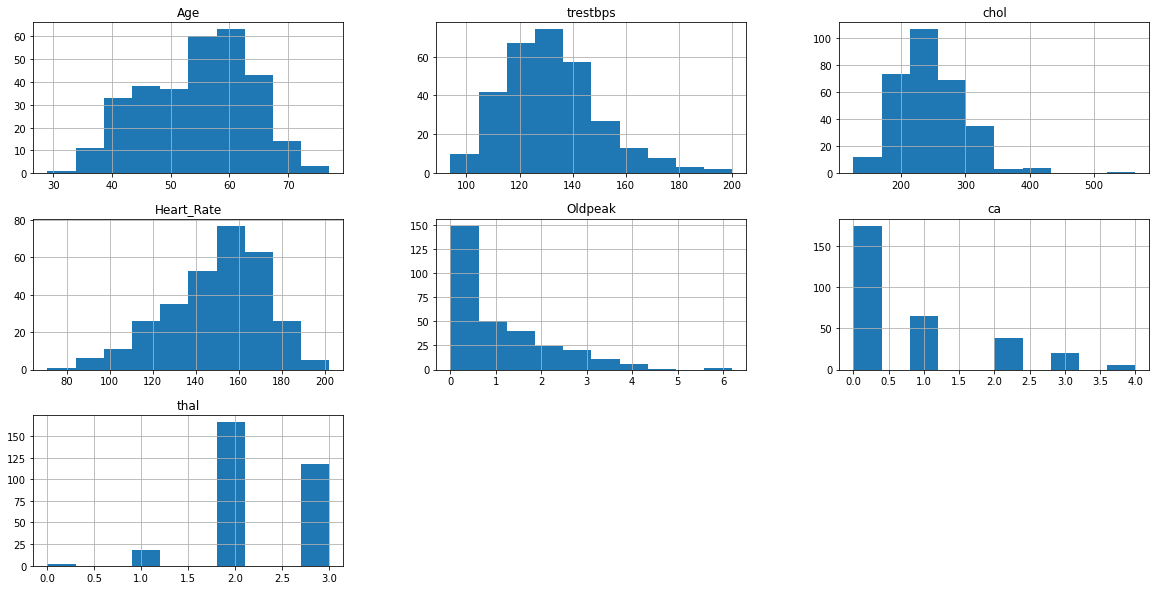

In [7]:
data.hist(figsize=(20, 10))

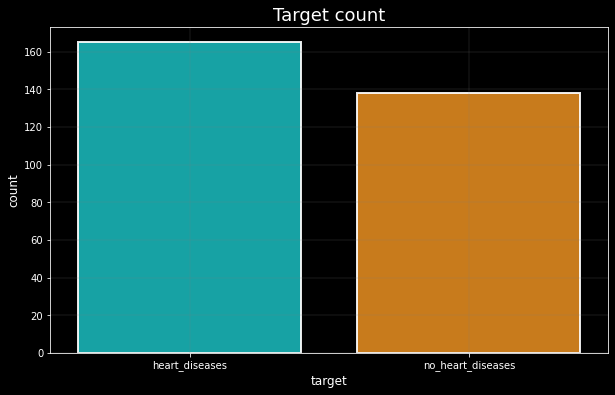

In [8]:
colors = ['darkturquoise', 'darkorange']
plt.style.use('dark_background')
plt.rcParams['figure.figsize']=(10,6)

ax = sns.countplot(x='target', data=data, palette=colors, alpha=0.9, edgecolor=('white'), linewidth=2)
ax.set_ylabel('count', fontsize=12)
ax.set_xlabel('target', fontsize=12)
ax.grid(b=True, which='major', color='grey', linewidth=0.2)
plt.title('Target count', fontsize=18)
plt.show()

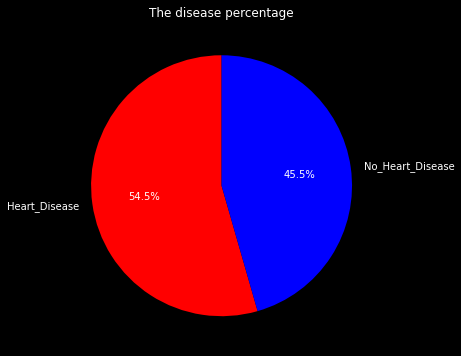

In [9]:
Detail = ['Heart_Disease', 'No_Heart_Disease']
colors =['r', 'b']
plt.pie(data['target'].value_counts(), labels = Detail, colors=colors, startangle=90, autopct='%.1f%%')
plt.rcParams['figure.figsize'] = (6,4)
plt.title('The disease percentage')
plt.show()

Text(0.5, 0.98, 'Patient Age')

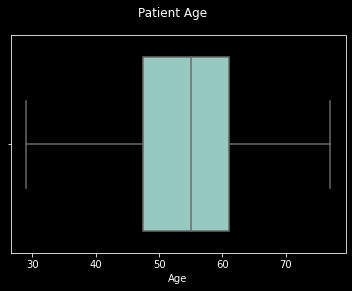

In [10]:
g = sns.boxplot(x=data["Age"])
plt.suptitle('Patient Age')

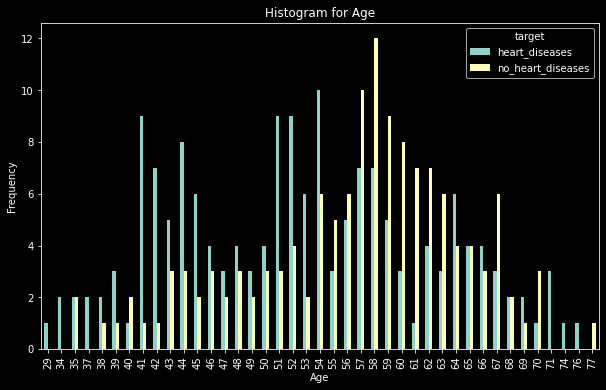

In [12]:
colors = ['r', 'b']
patient = pd.crosstab(data['Age'], data['target'])
patient.plot(kind = 'bar')
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.rcParams['figure.figsize'] = (10,6)



In [ ]:
From the above table, the patients above 55 years are more likely to have heart disease compared to the patients below 55 years. I also noticed that between the age 71 to 76, the heart disease is not common.  

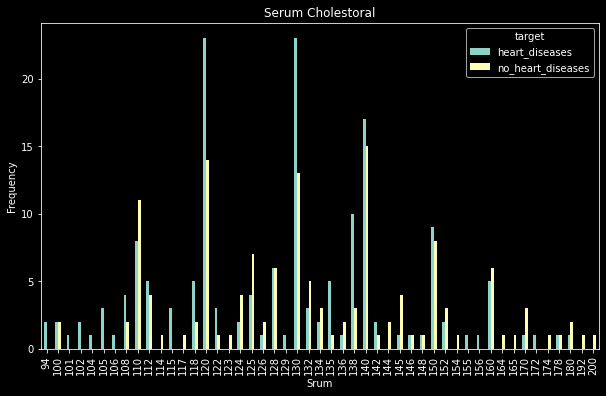

In [13]:
patient = pd.crosstab(data['trestbps'], data['target'])
patient.plot(kind = 'bar')
plt.title('Serum Cholestoral')
plt.xlabel('Srum')
plt.ylabel('Frequency')
plt.rcParams['figure.figsize'] = (10,6)

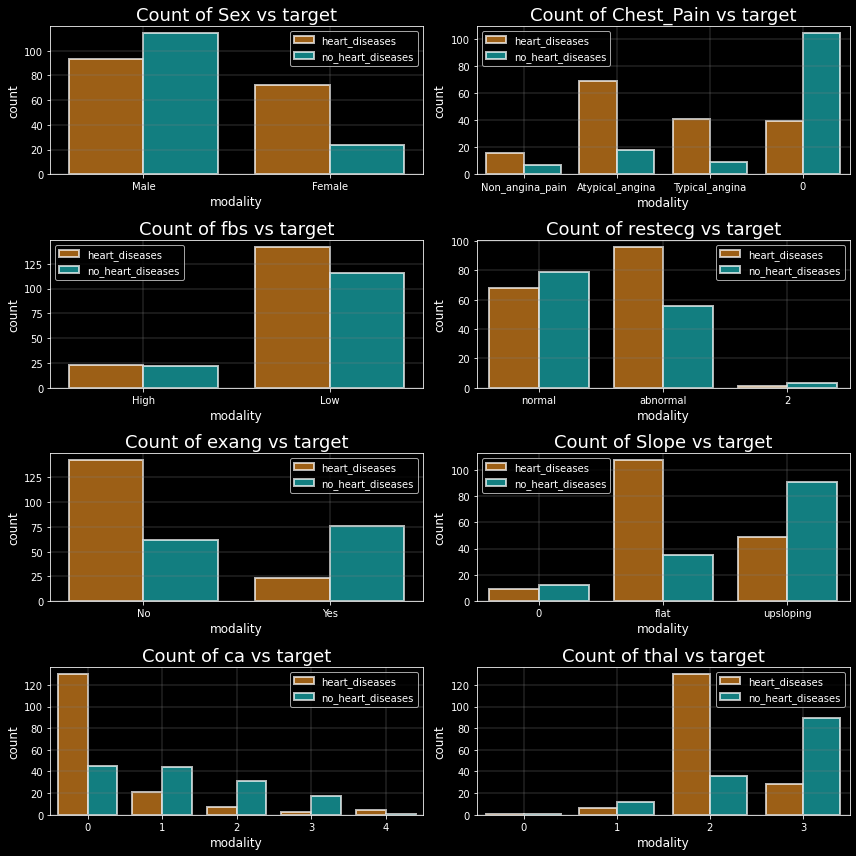

In [14]:
f,ax=plt.subplots(4,2,figsize=(12,12))

for i,feature in enumerate(['Sex','Chest_Pain','fbs','restecg','exang','Slope','ca','thal']):
    colors = ['darkorange', 'darkturquoise']
    
    sns.countplot(x=feature,data=data,hue='target',ax=ax[i//2,i%2], palette = colors, alpha=0.7, edgecolor=('white'), linewidth=2)
    ax[i//2,i%2].grid(b=True, which='major', color='grey', linewidth=0.4)
    ax[i//2,i%2].set_title('Count of {} vs target'.format(feature), fontsize=18)
    ax[i//2,i%2].legend(loc='best')
    ax[i//2,i%2].set_ylabel('count', fontsize=12)
    ax[i//2,i%2].set_xlabel('modality', fontsize=12)

plt.tight_layout()
plt.show()

In [15]:

def multivariate_count(var):
    for x in [
        'Sex',
        'Chest_Pain',
        'fbs',
        'restecg',
        'exang',
        'Slope',
        'ca',
        'thal']:
        ax = sns.catplot(x=x, hue="target", col=var, 
               data=data, kind="count", palette = ['darkturquoise', 'darkorange'], alpha=0.7, edgecolor=('white'), linewidth=2)
        ax.fig.suptitle(str(var)+' vs '+str(x)+' vs target', fontsize=18) 
    
        plt.subplots_adjust(top=0.8)
        plt.show()

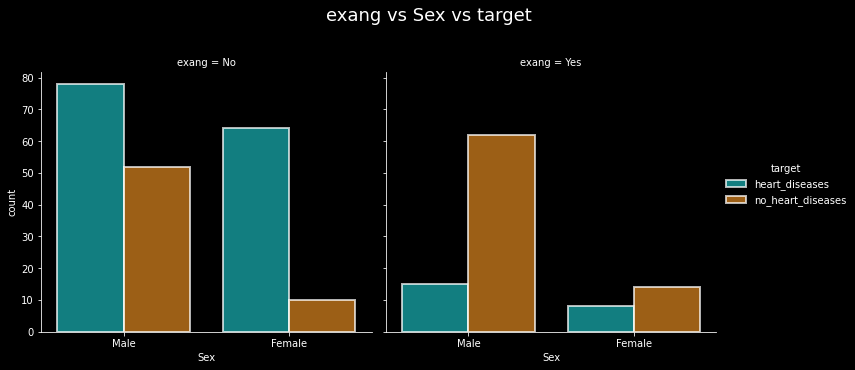

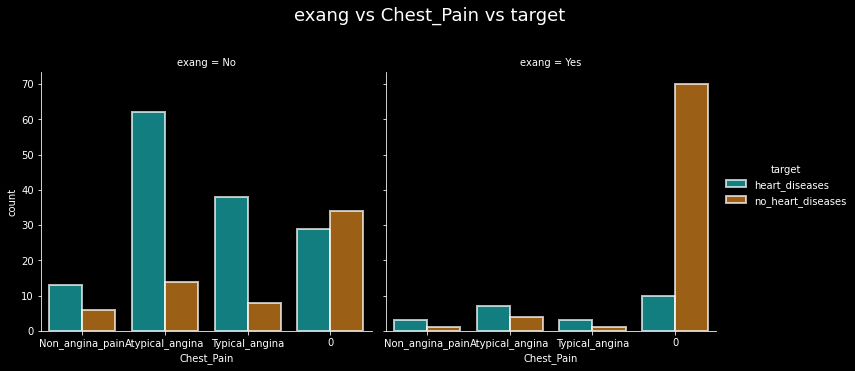

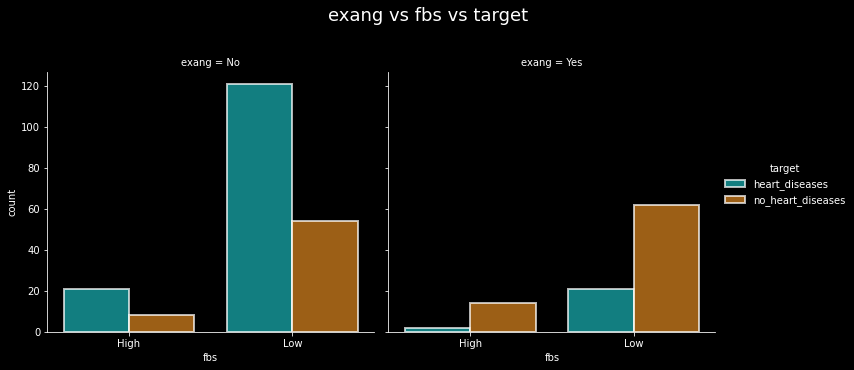

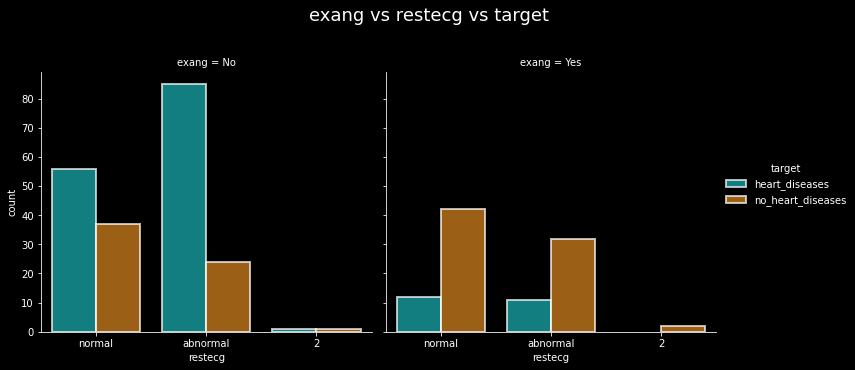

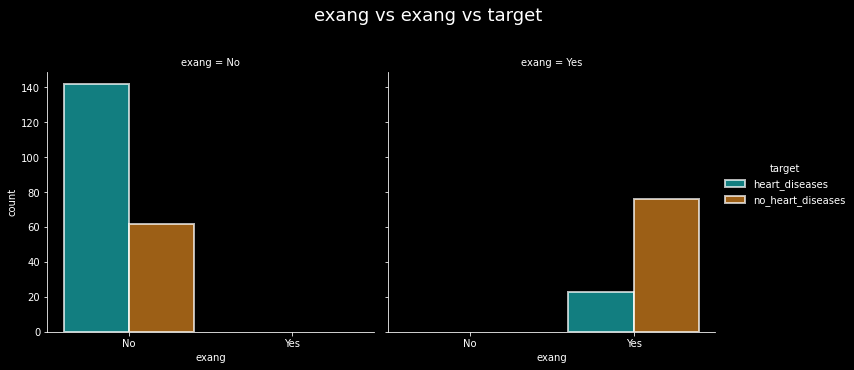

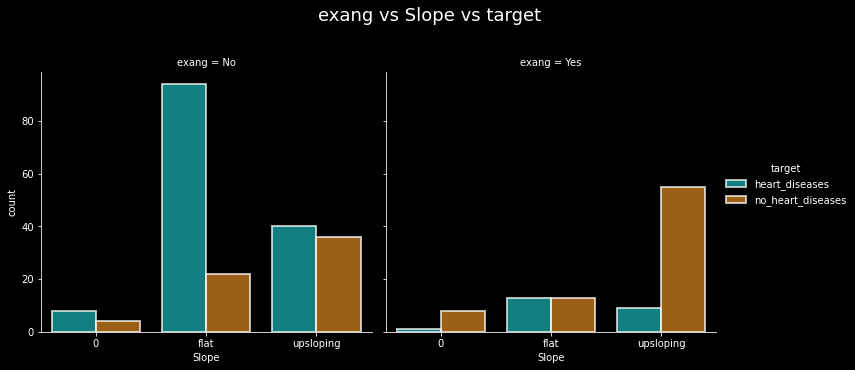

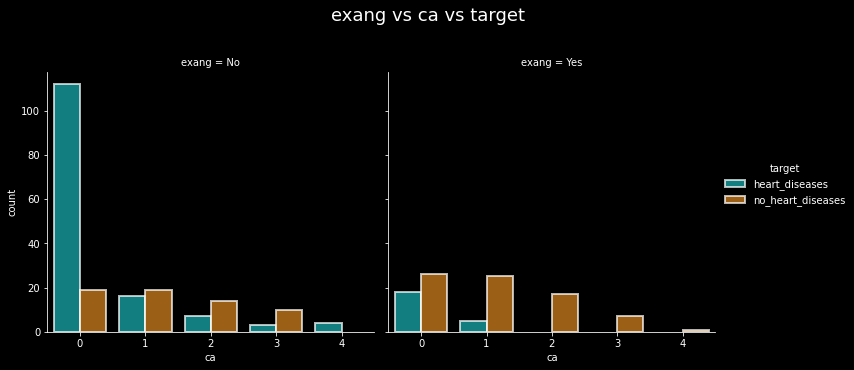

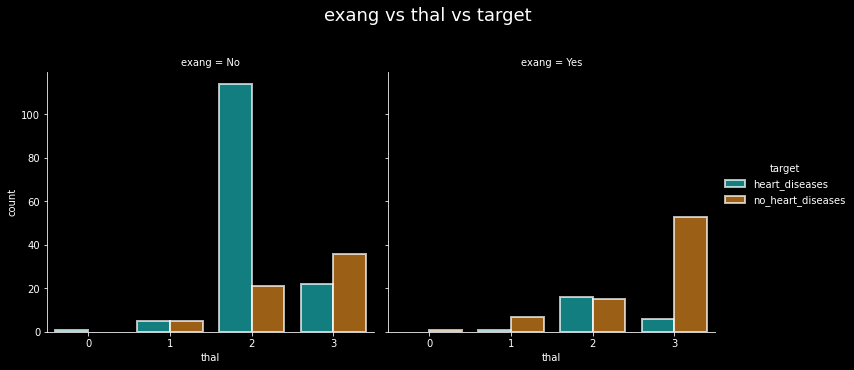

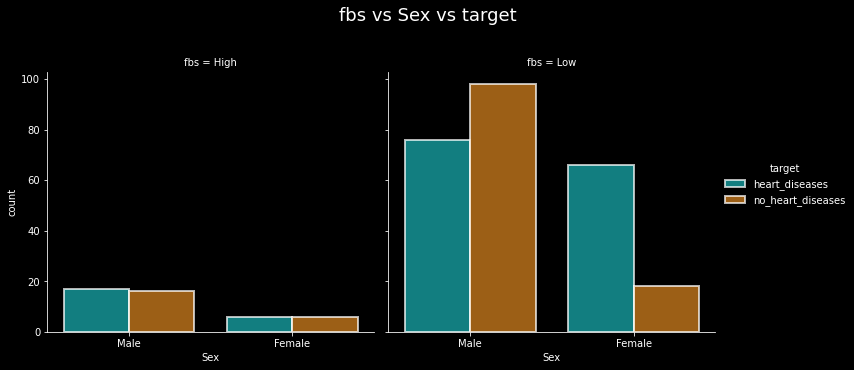

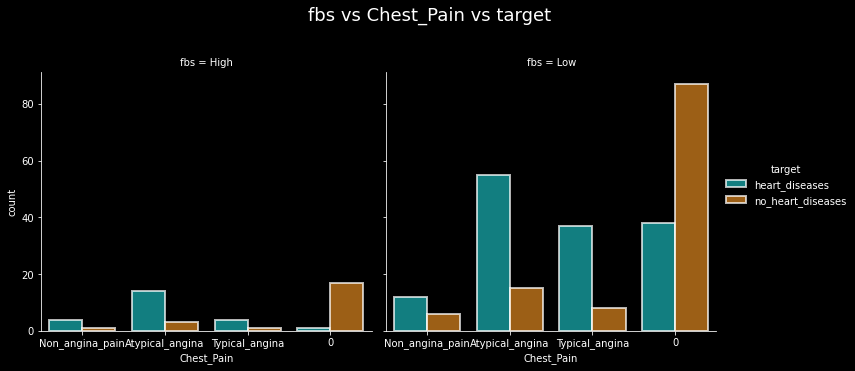

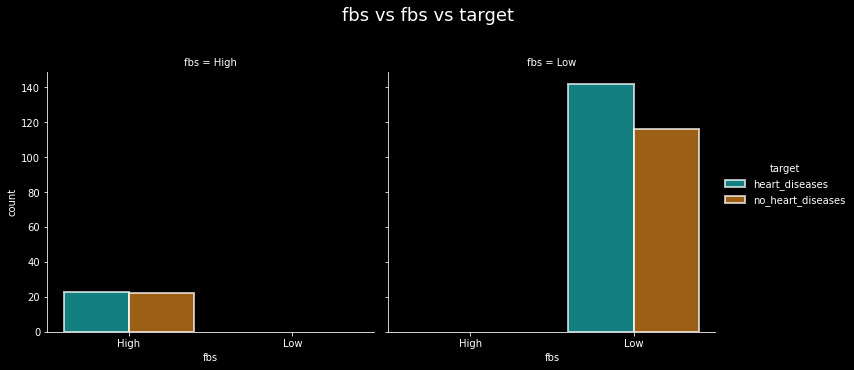

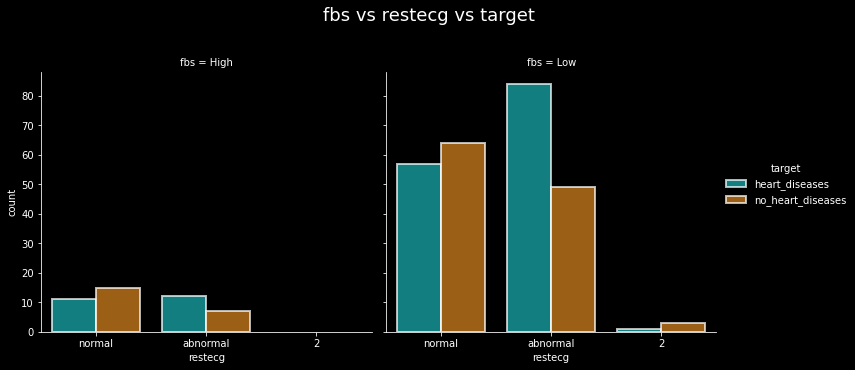

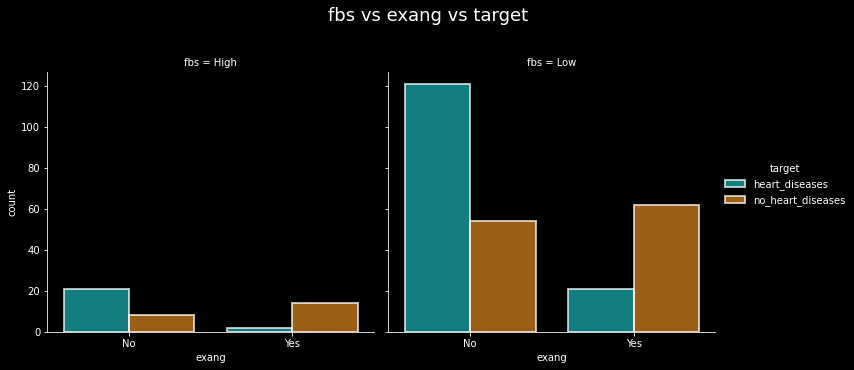

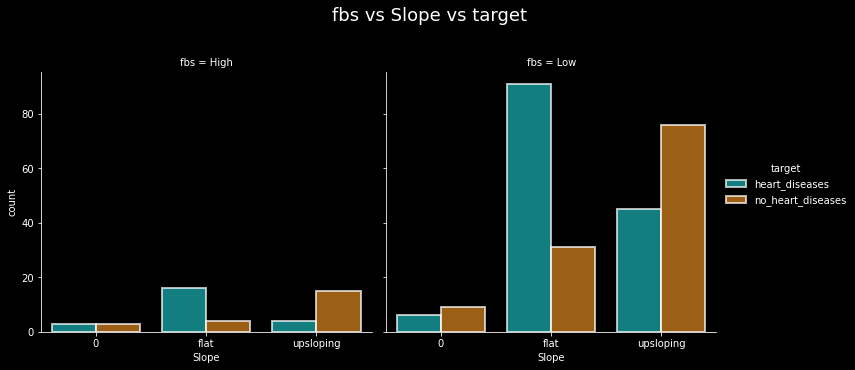

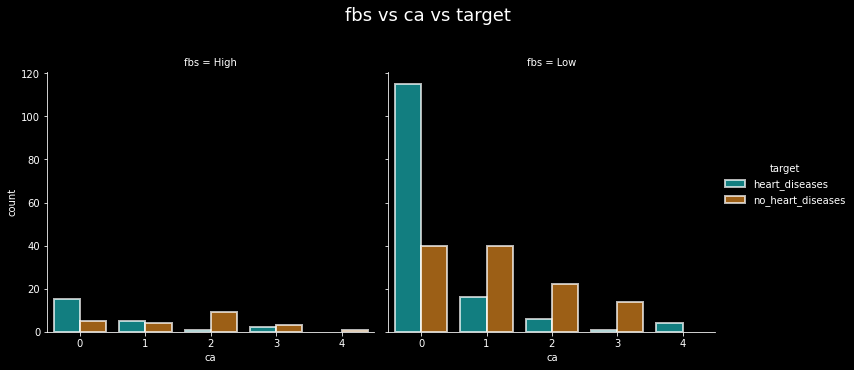

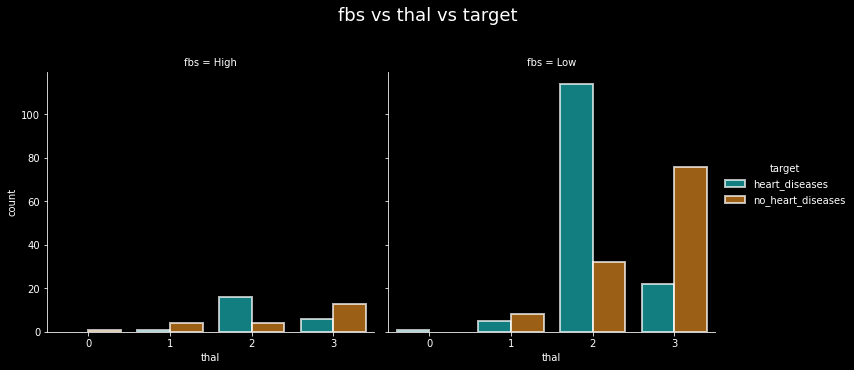

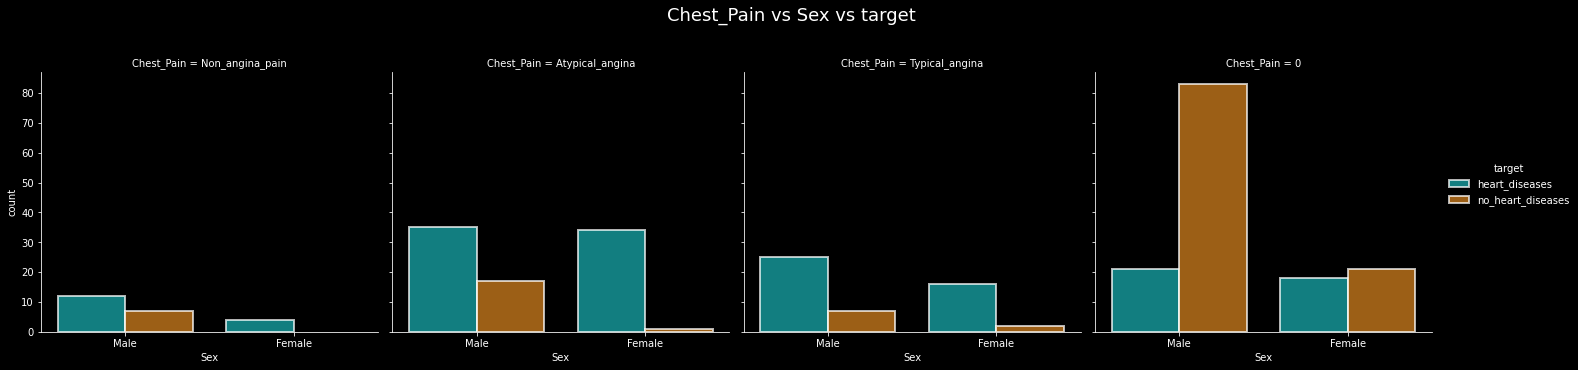

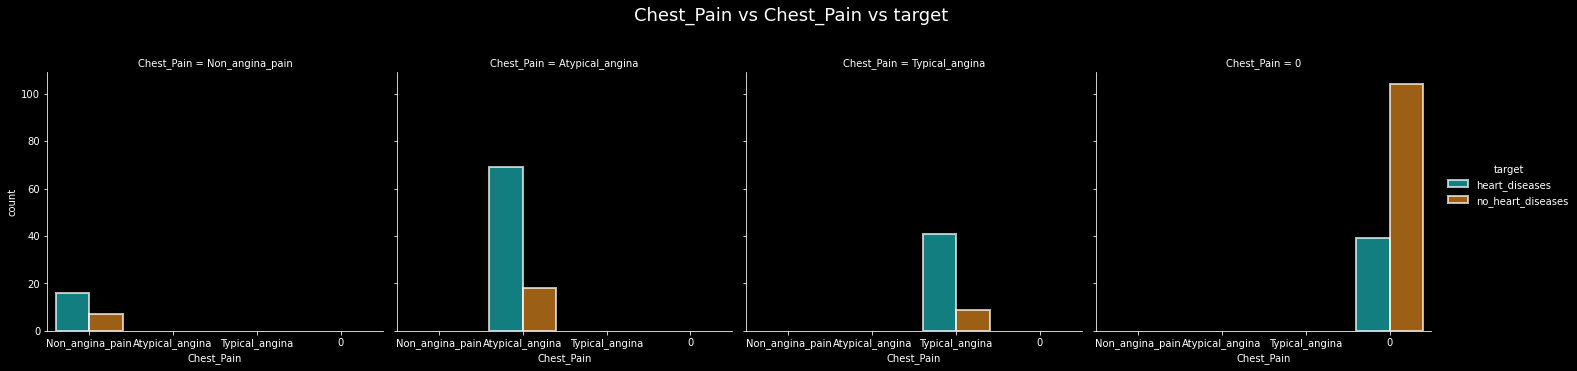

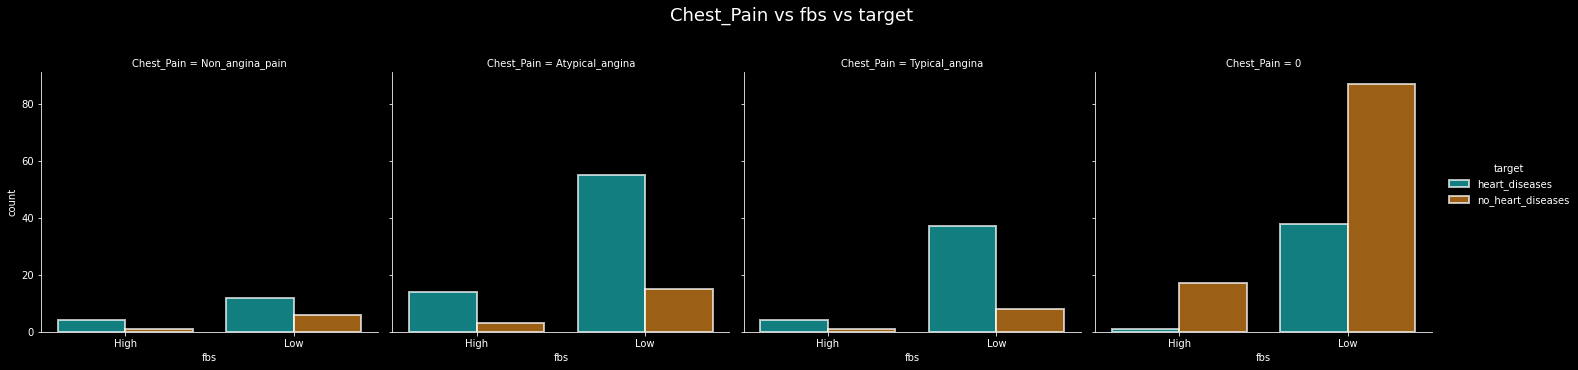

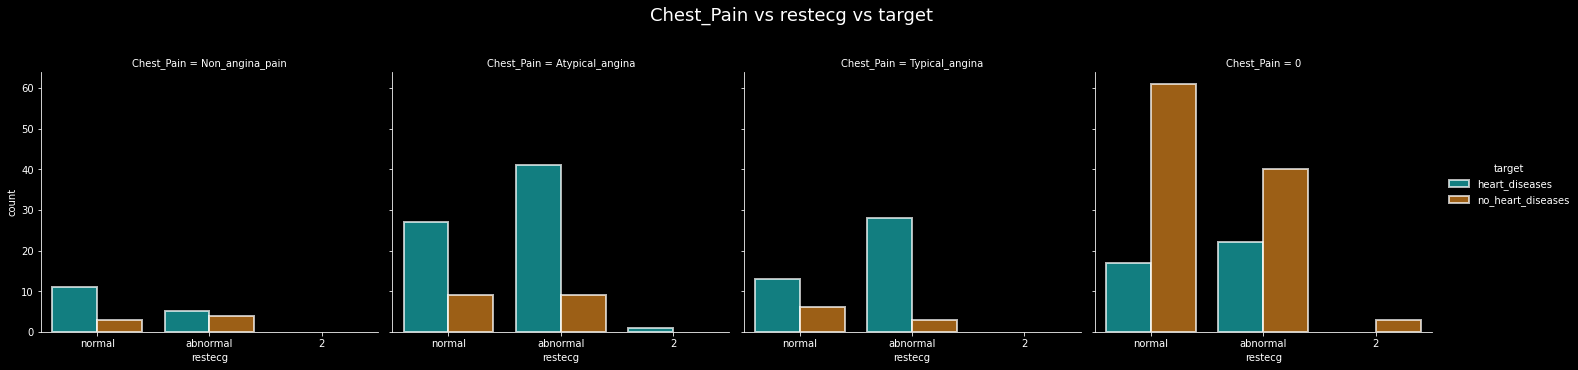

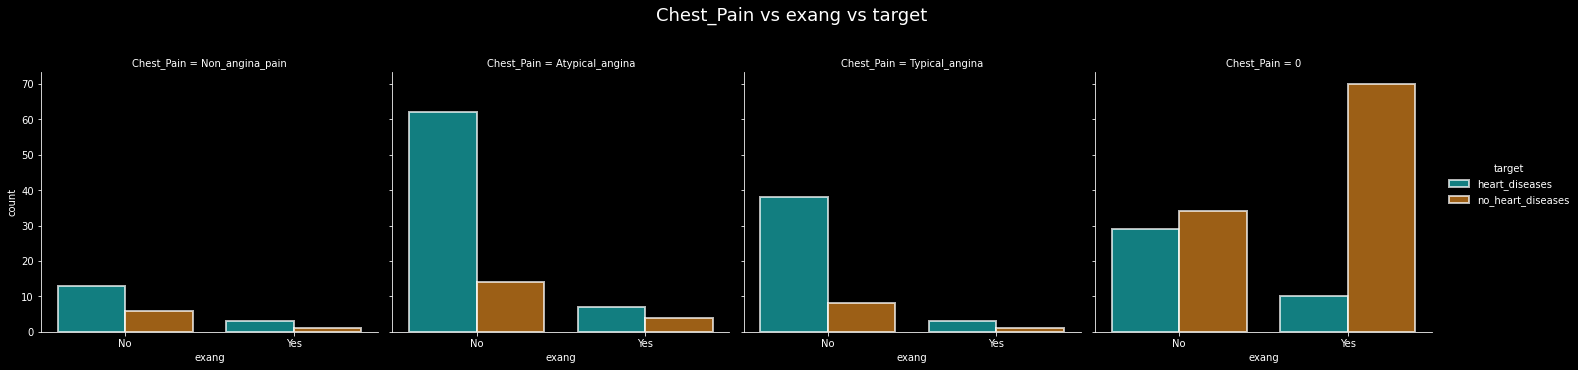

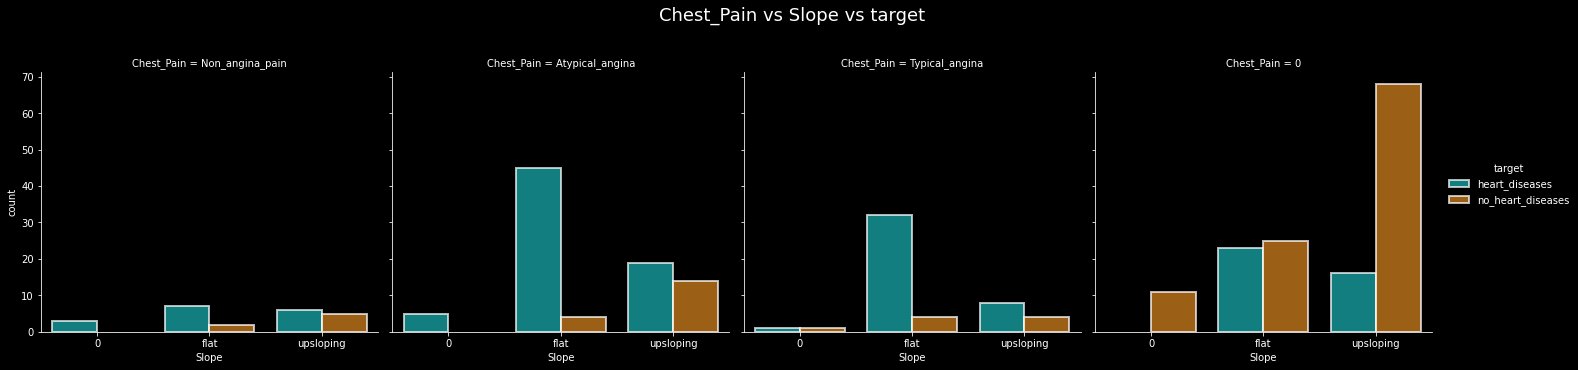

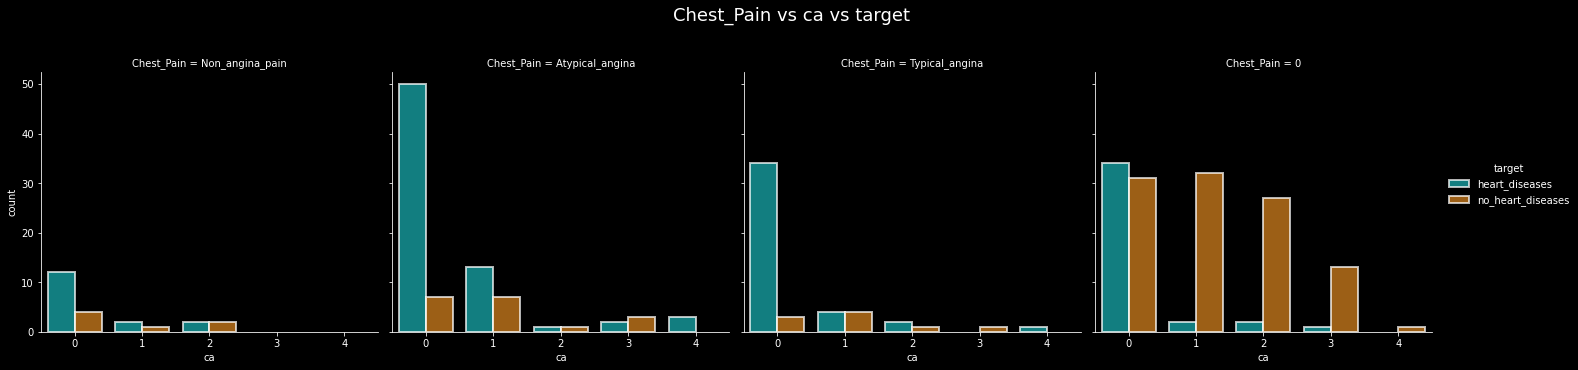

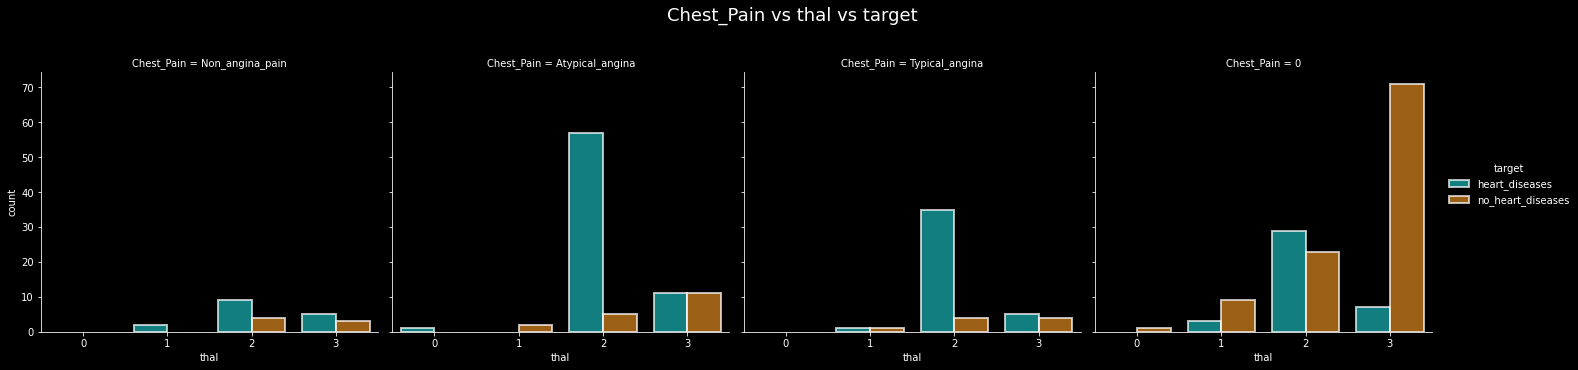

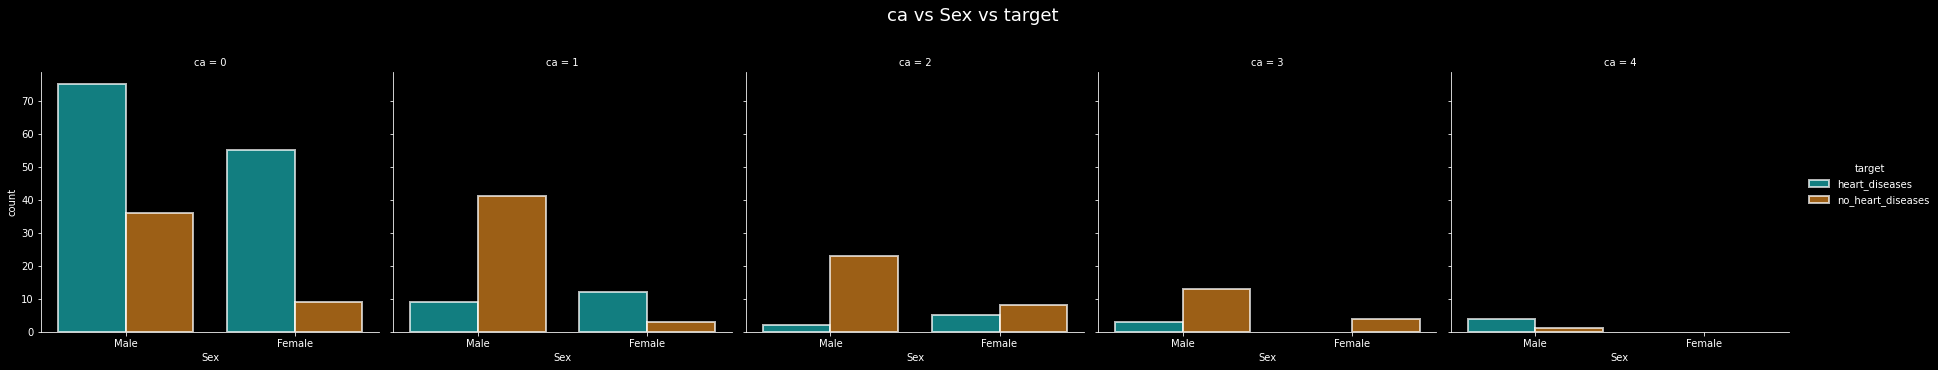

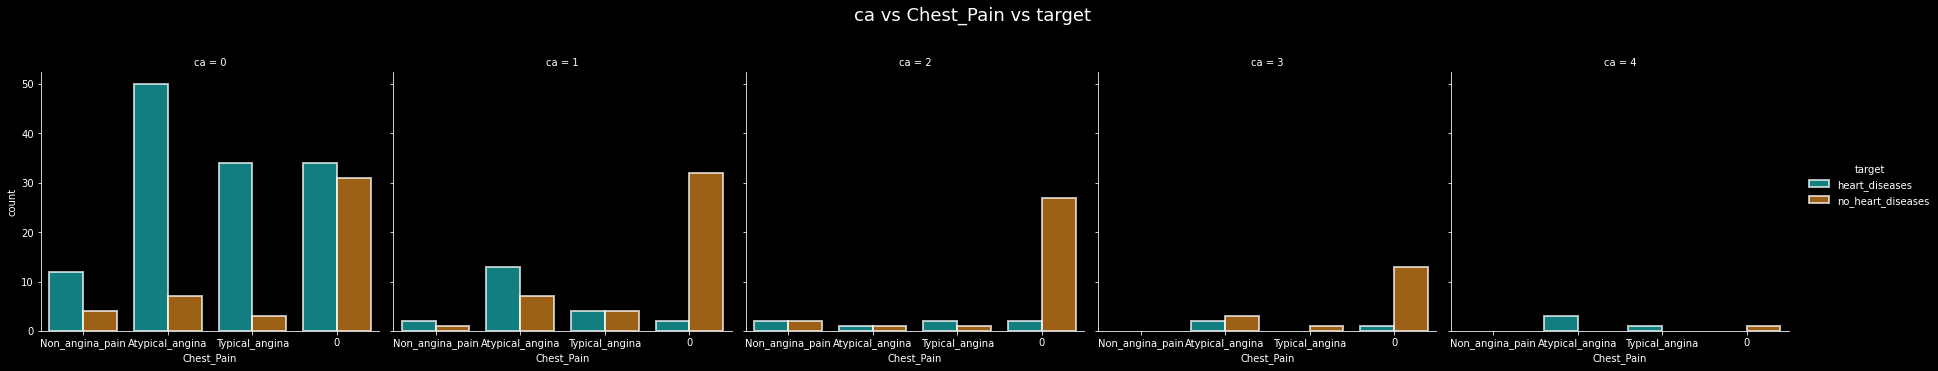

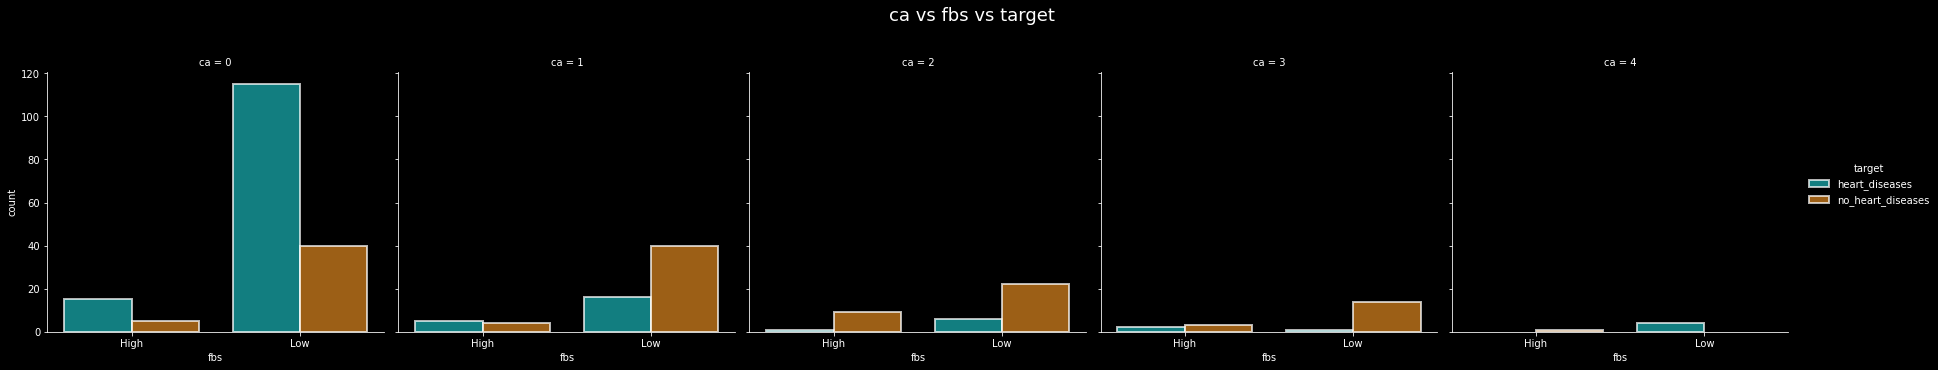

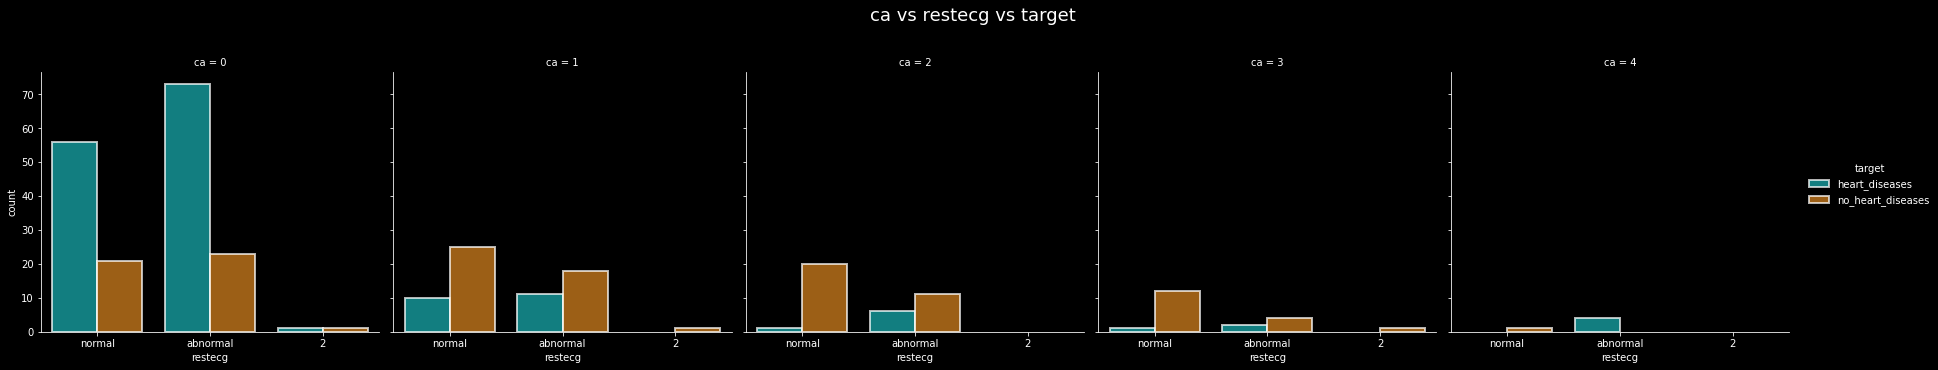

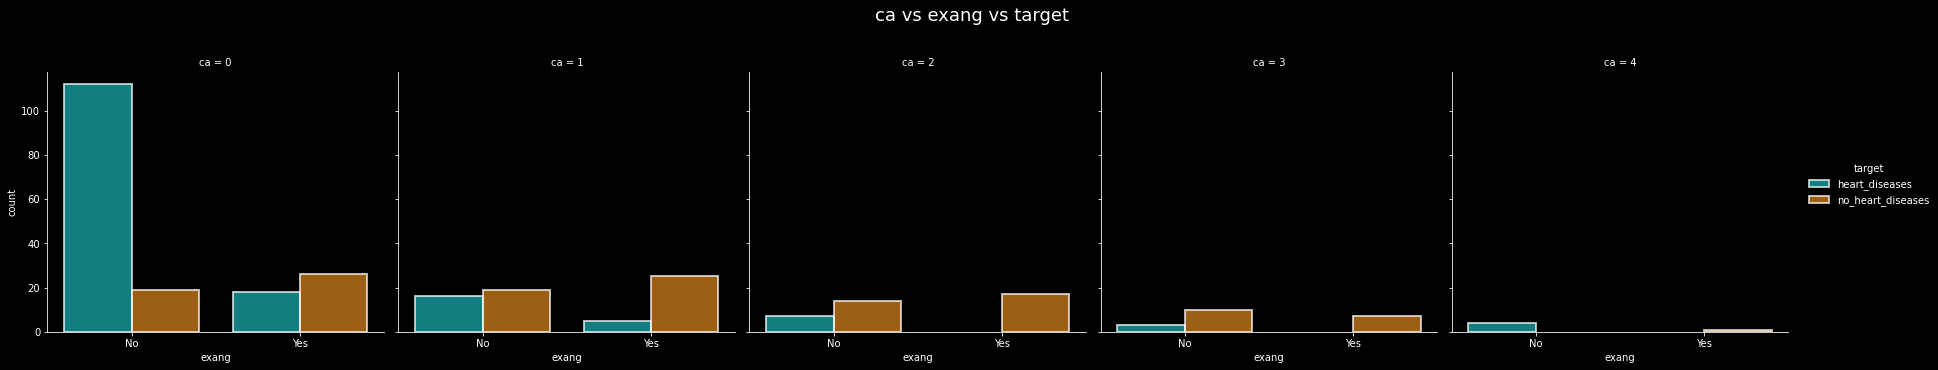

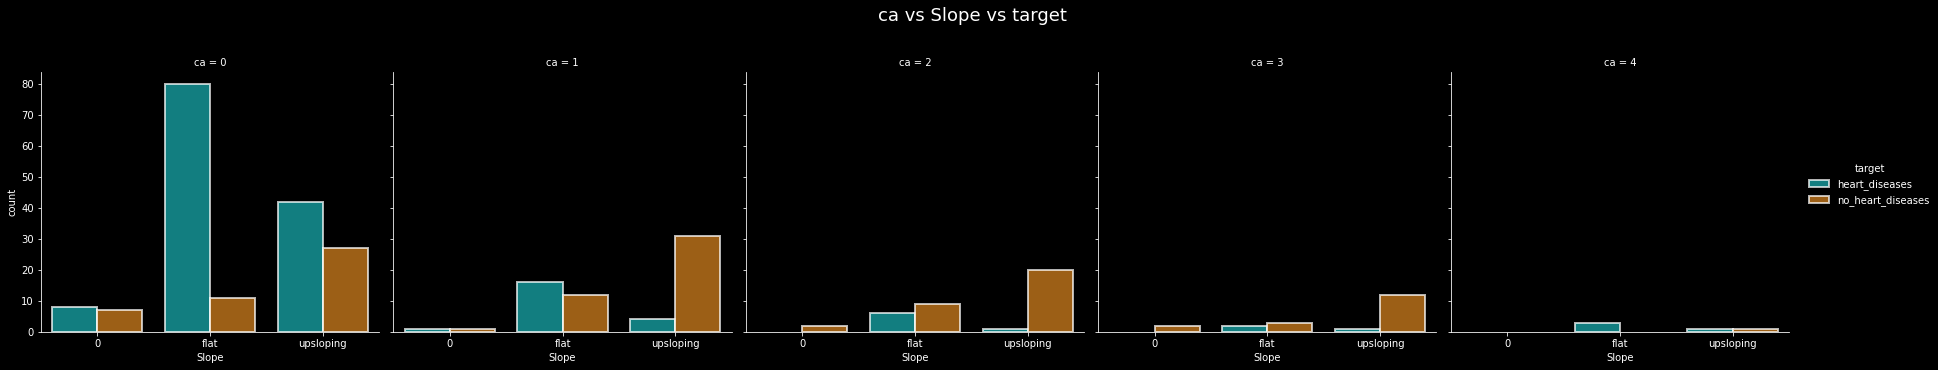

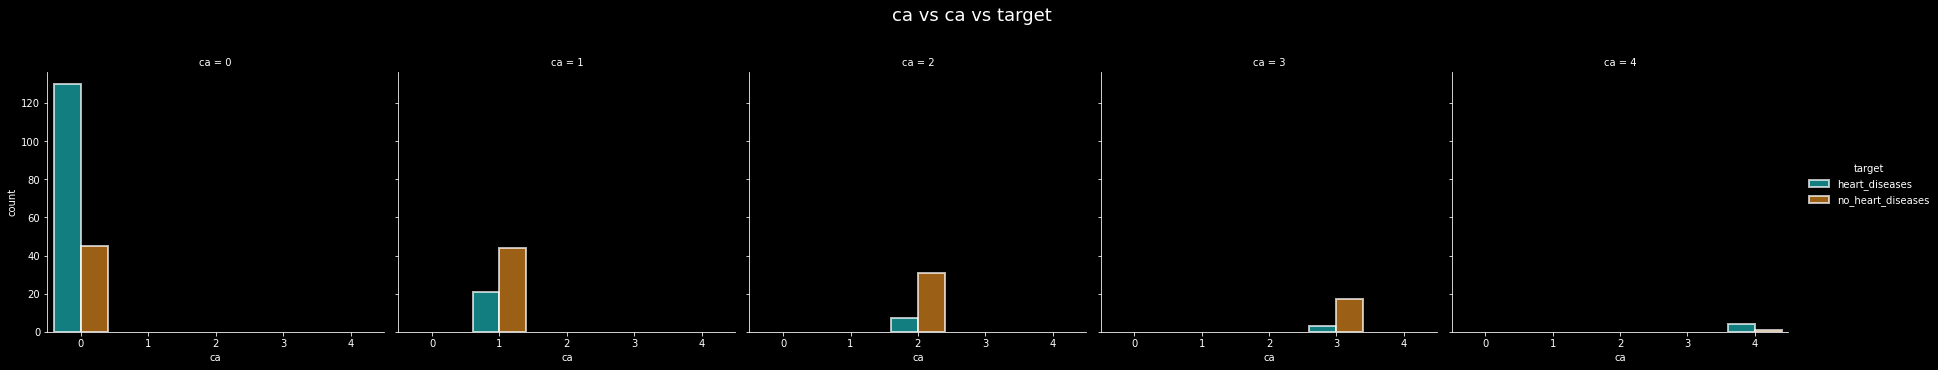

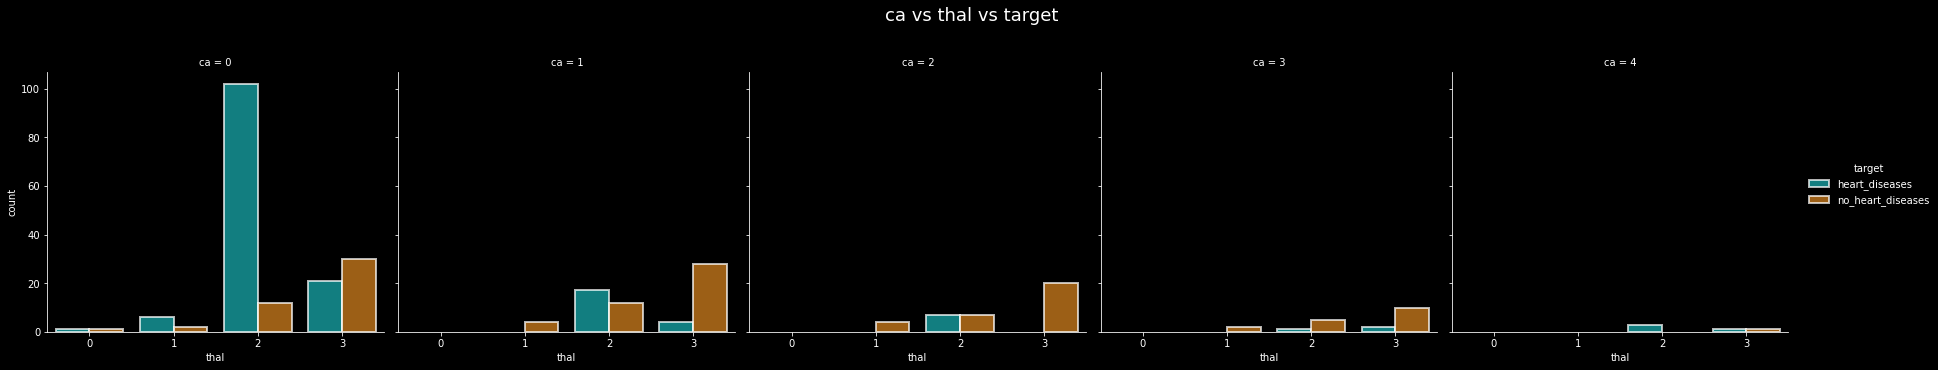

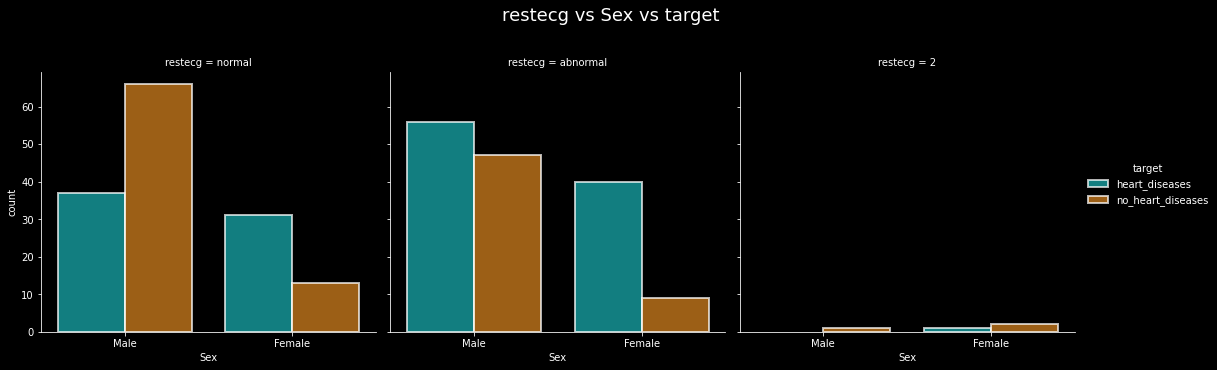

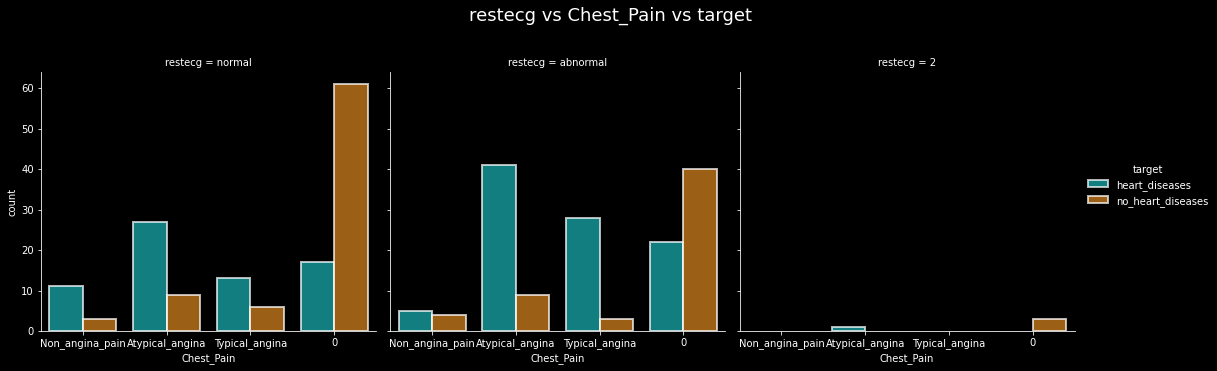

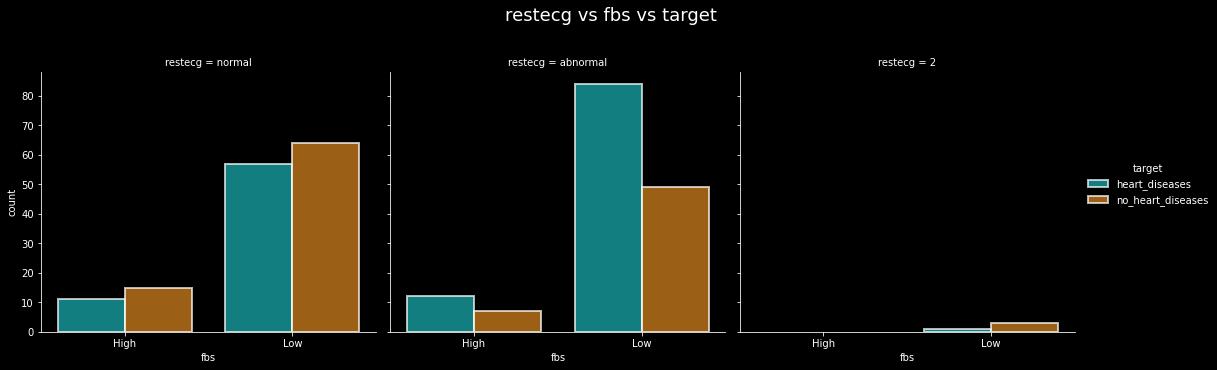

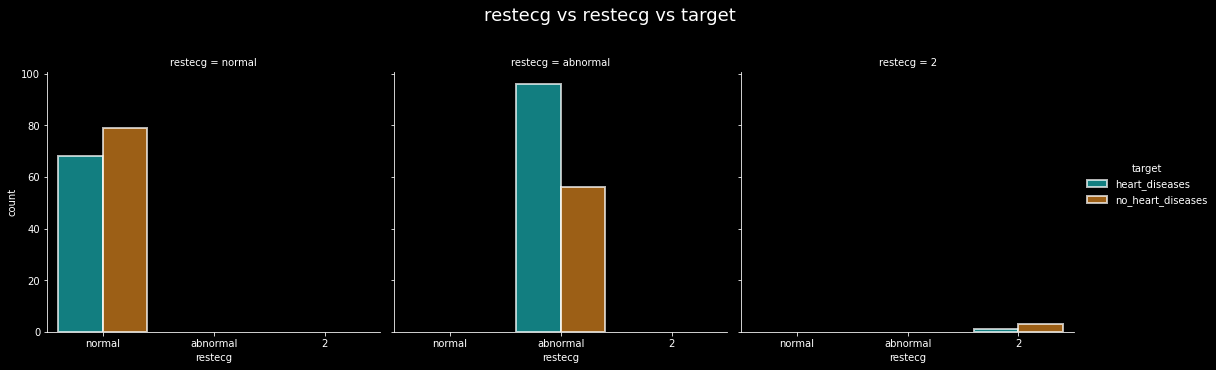

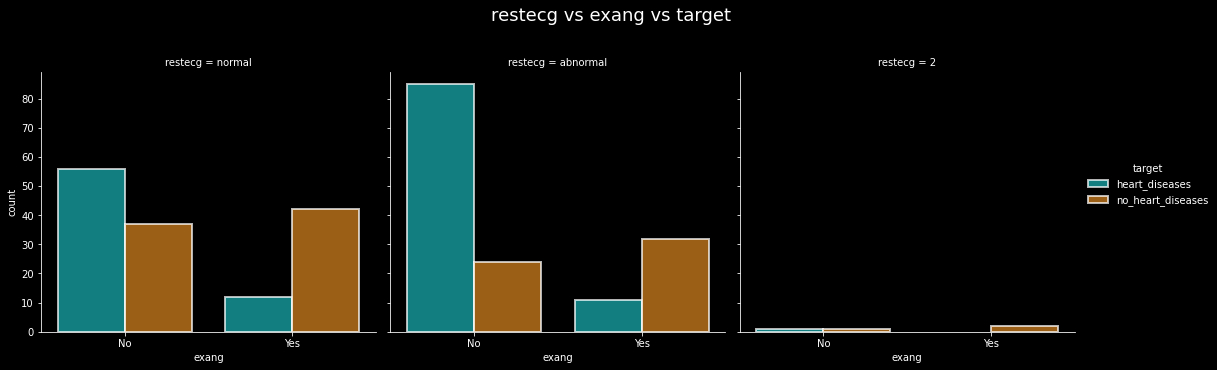

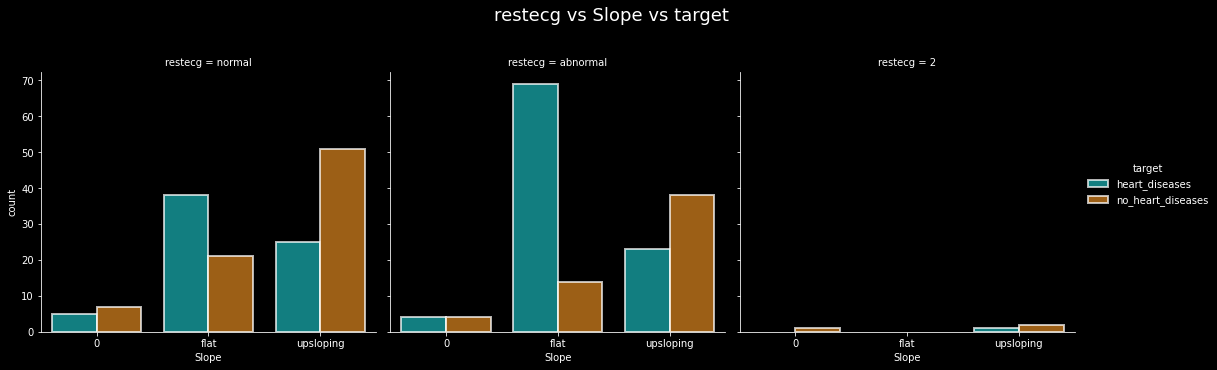

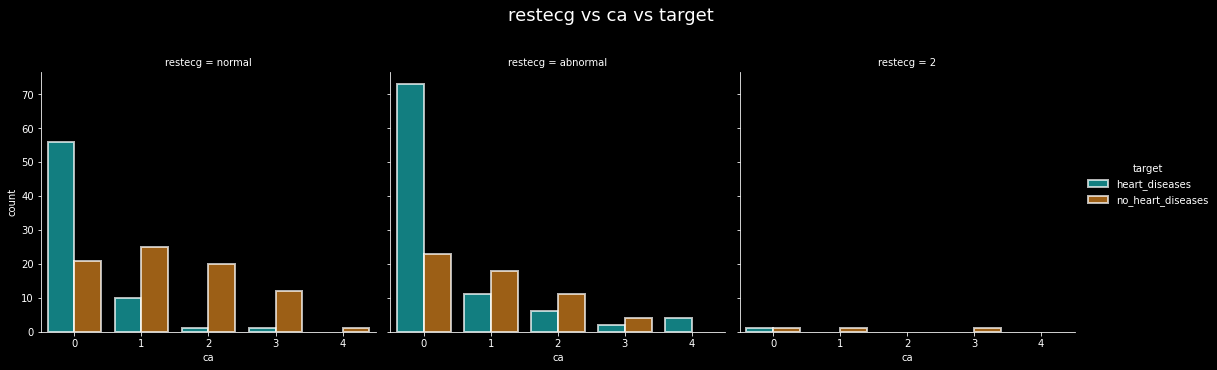

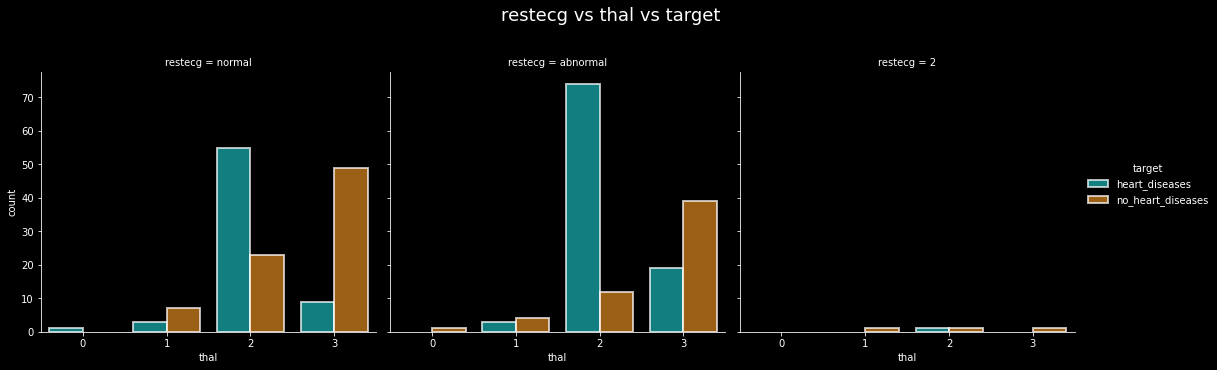

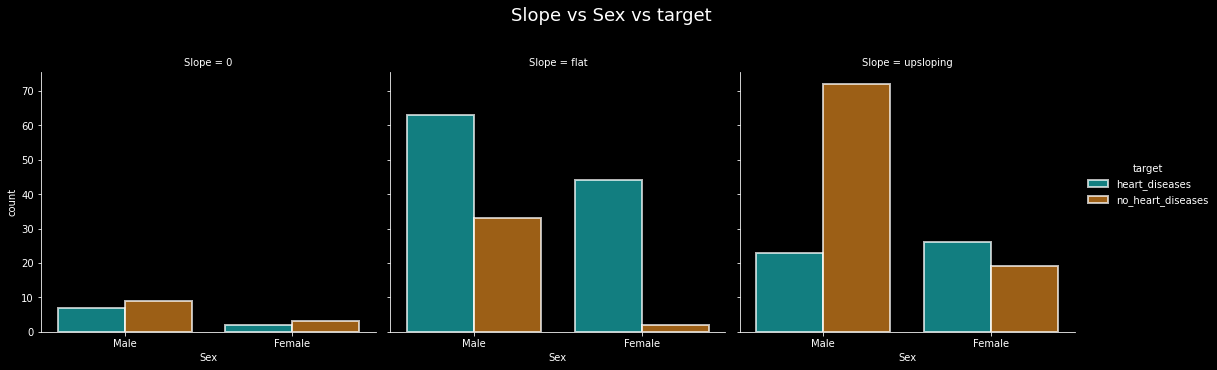

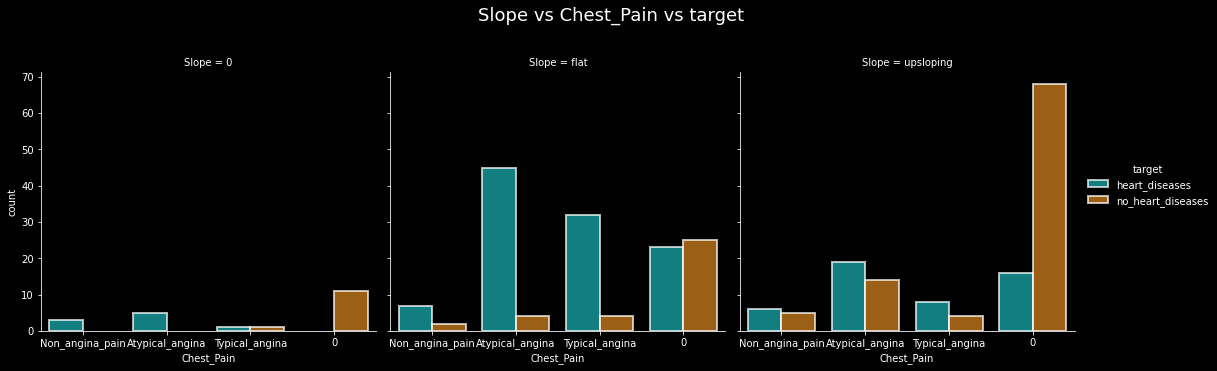

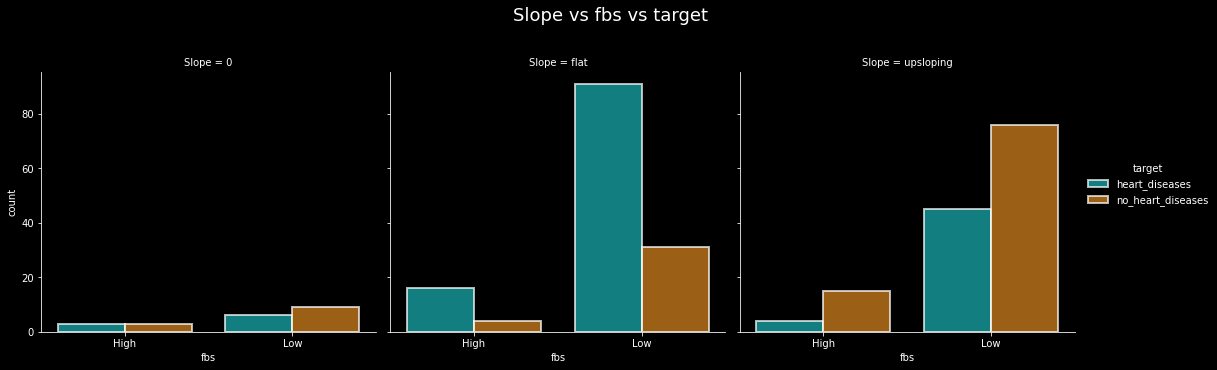

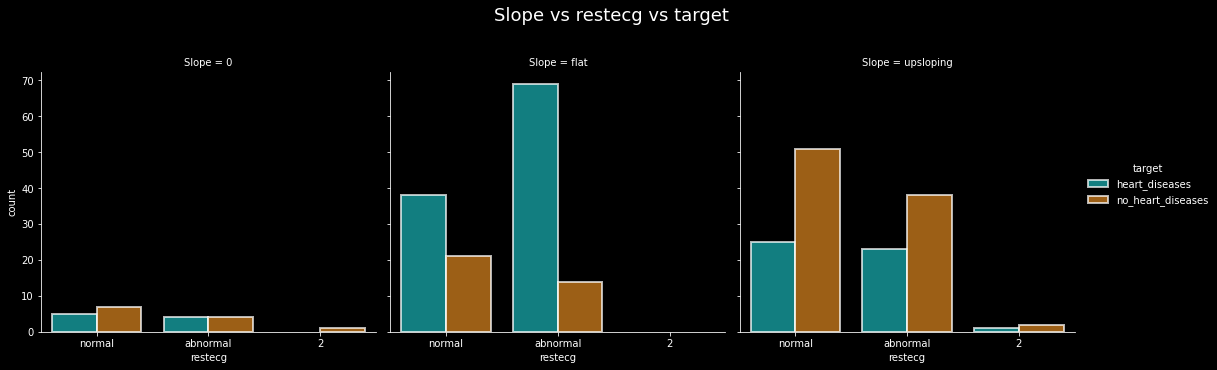

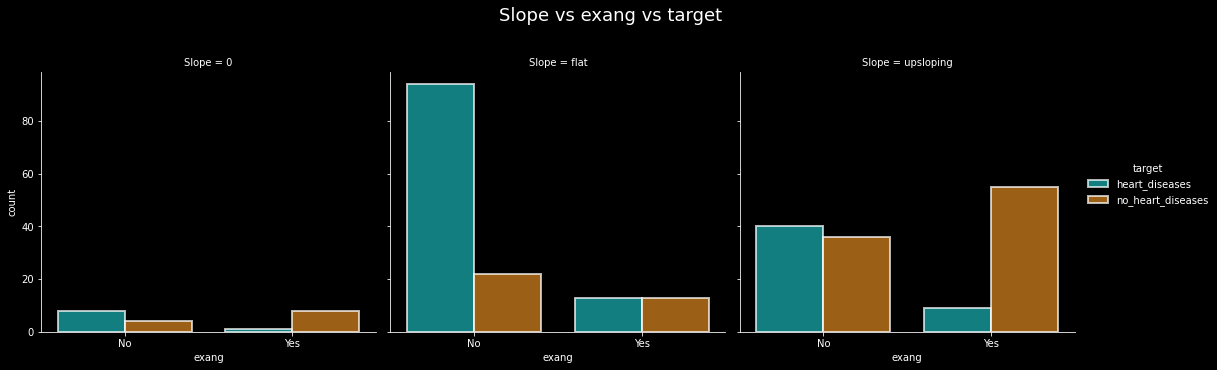

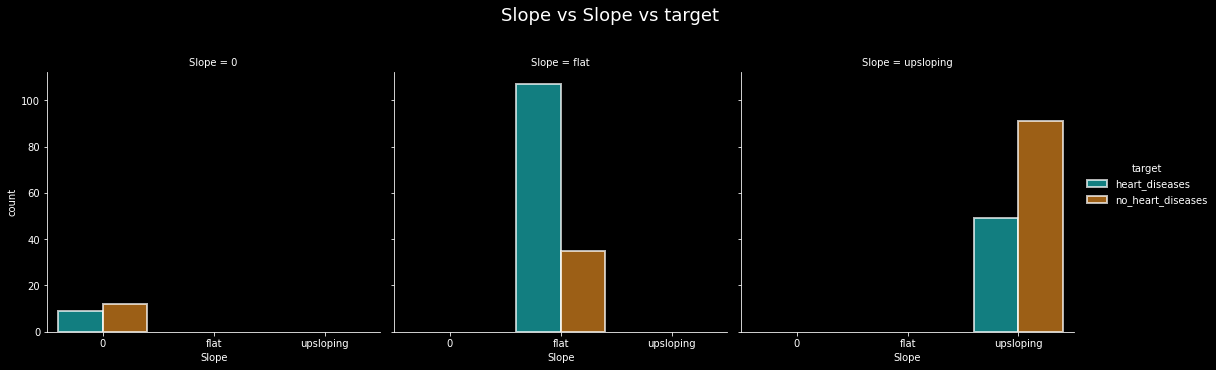

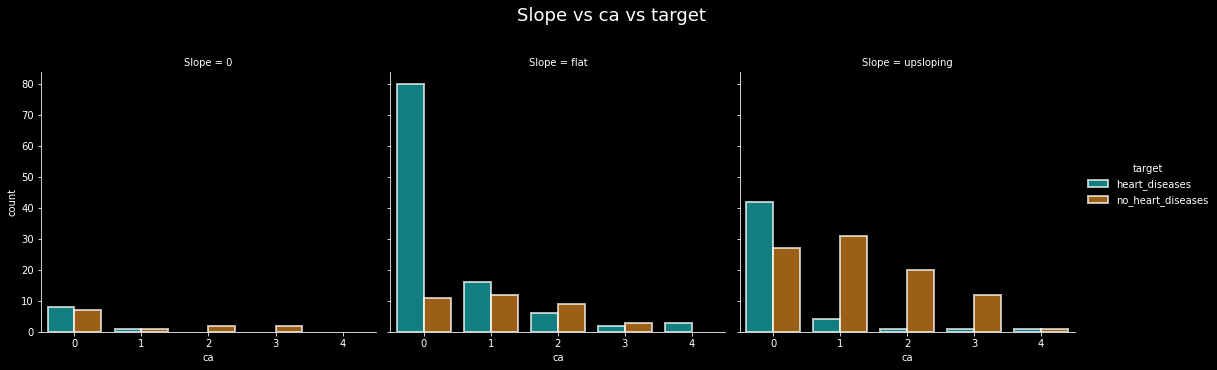

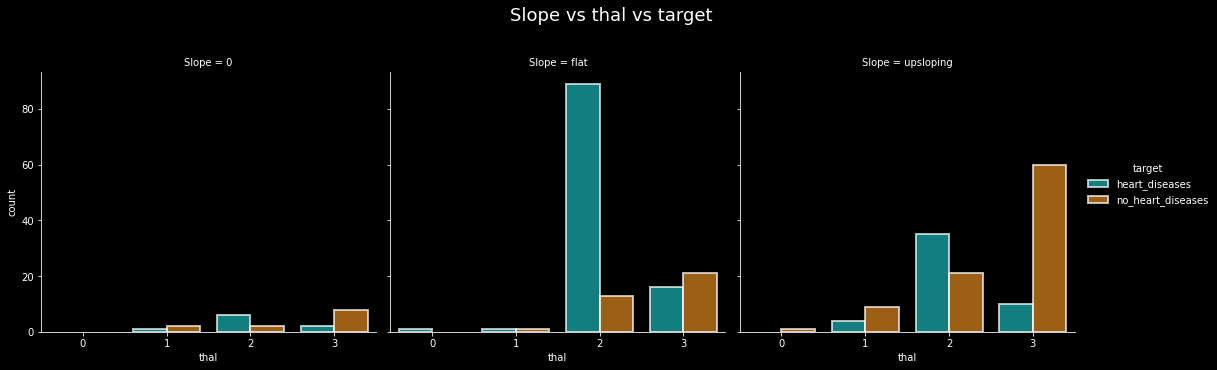

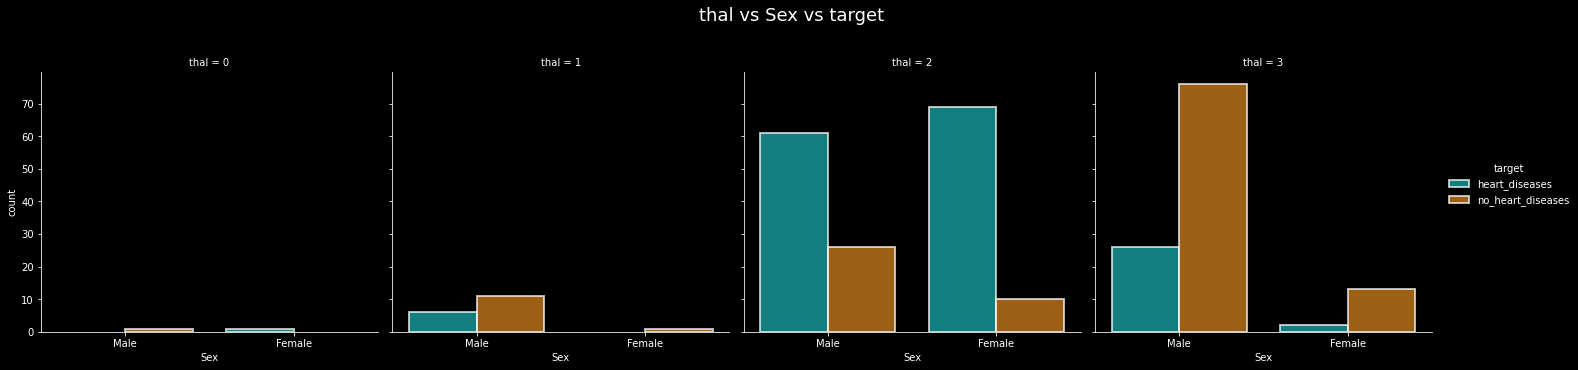

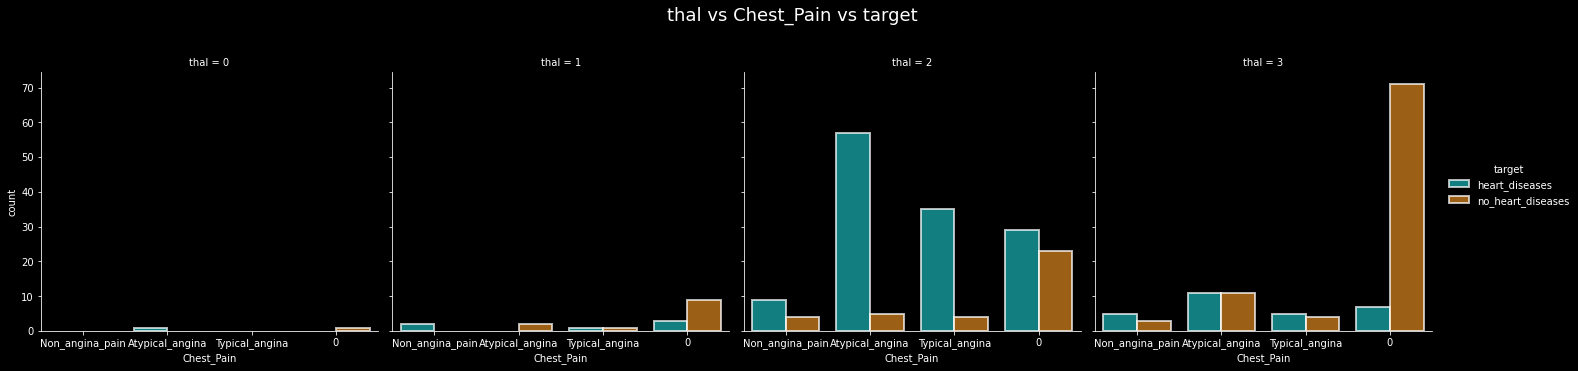

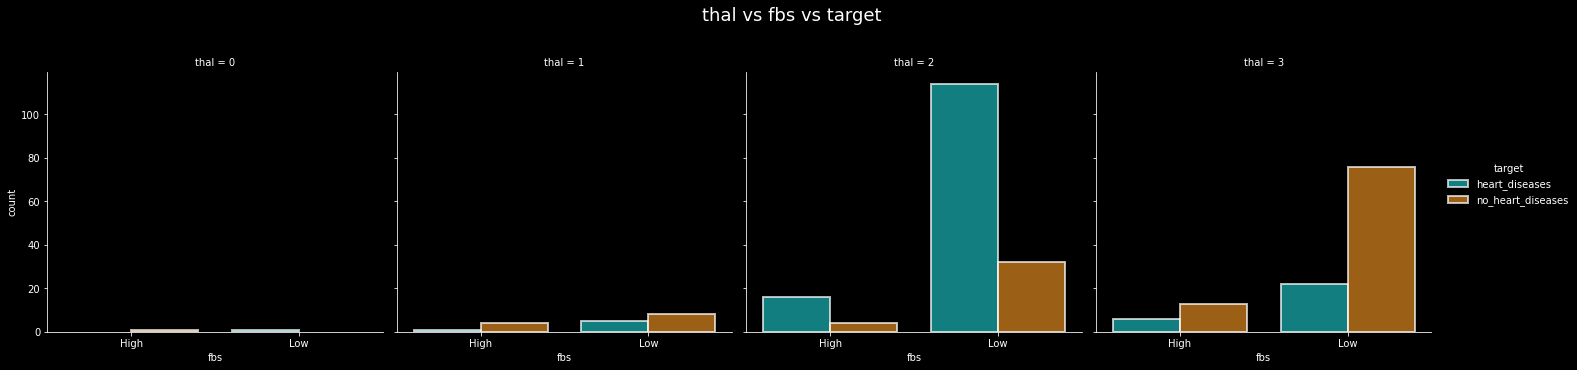

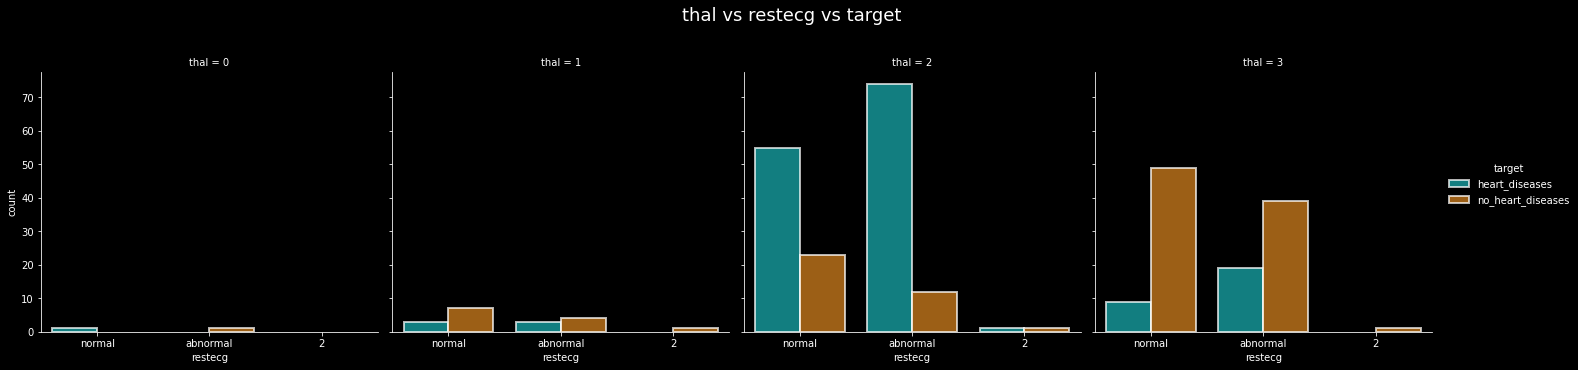

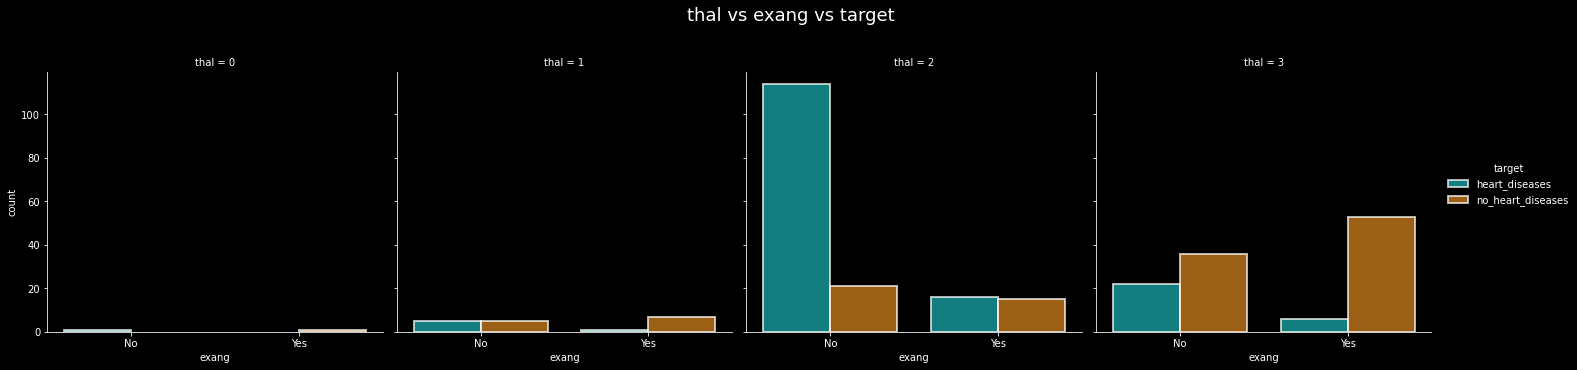

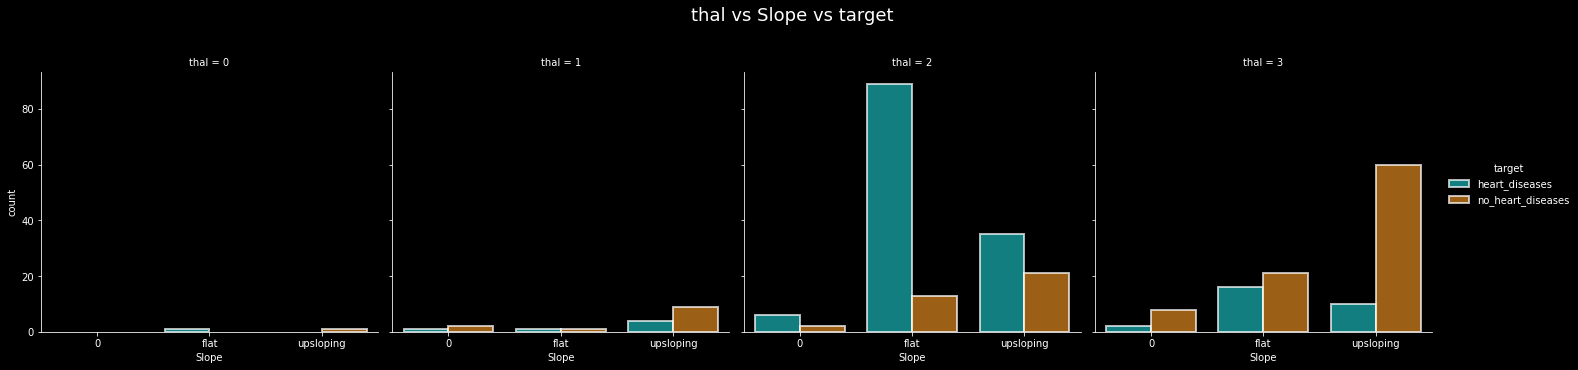

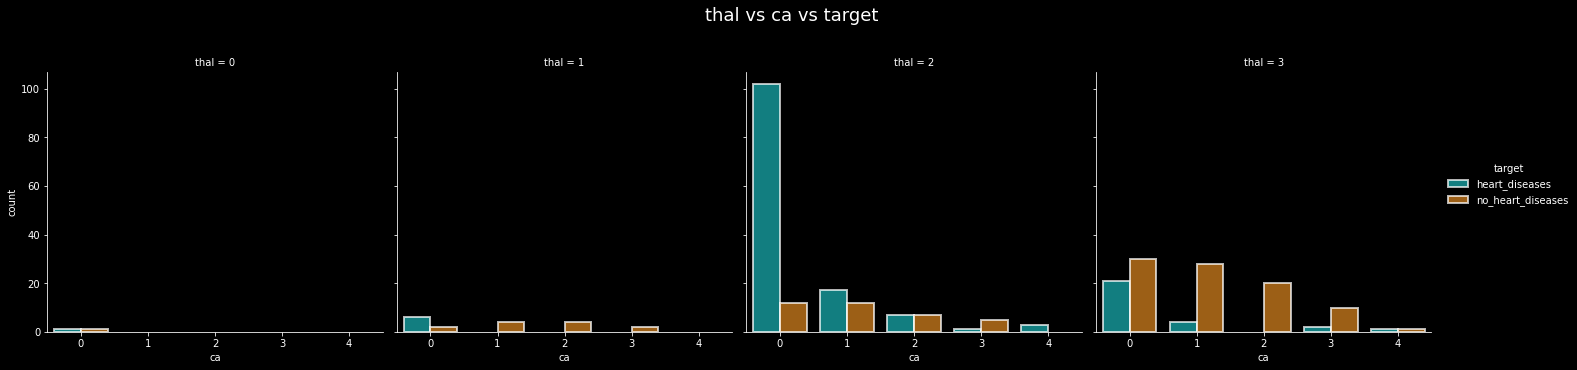

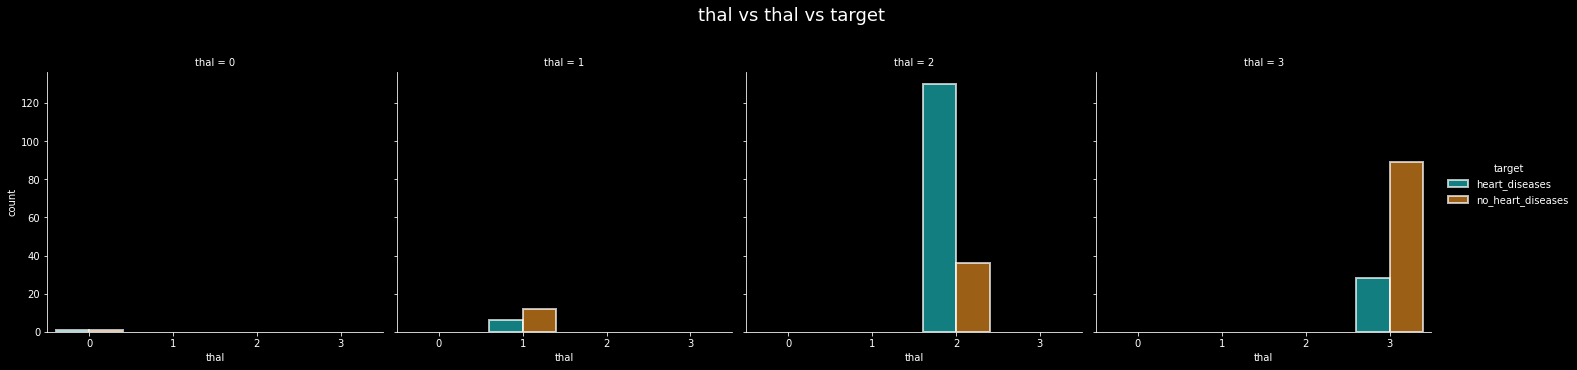

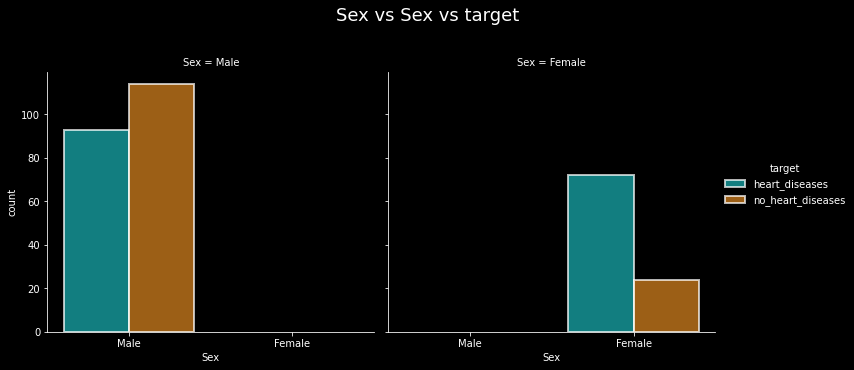

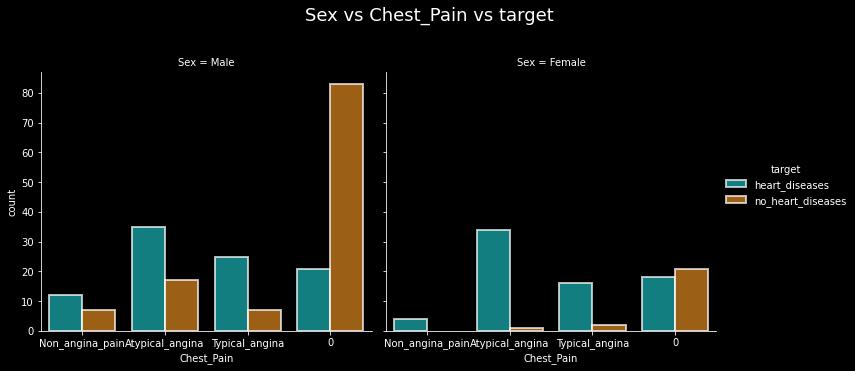

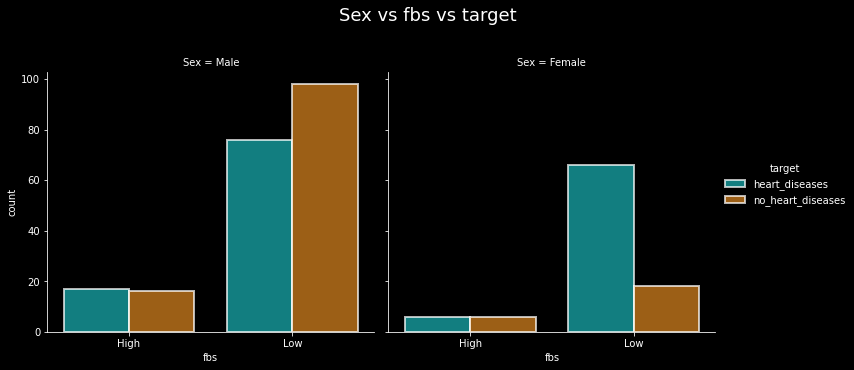

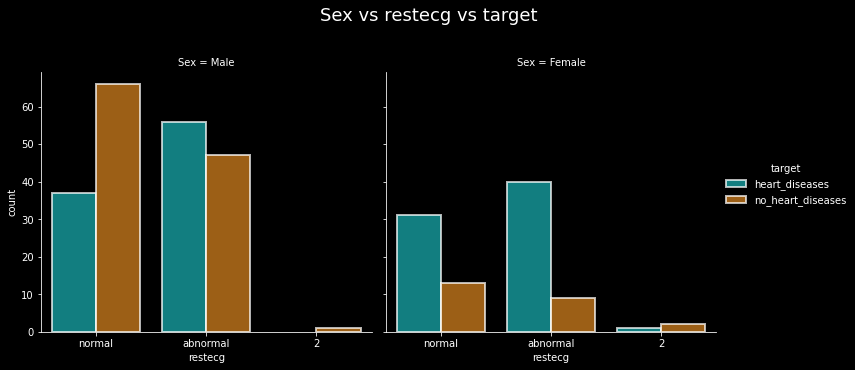

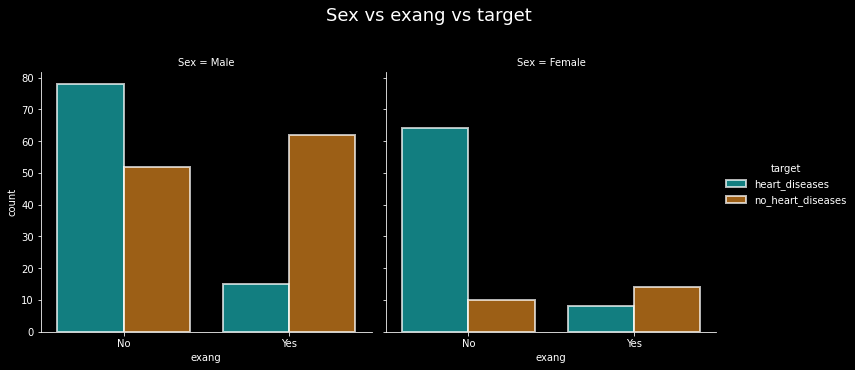

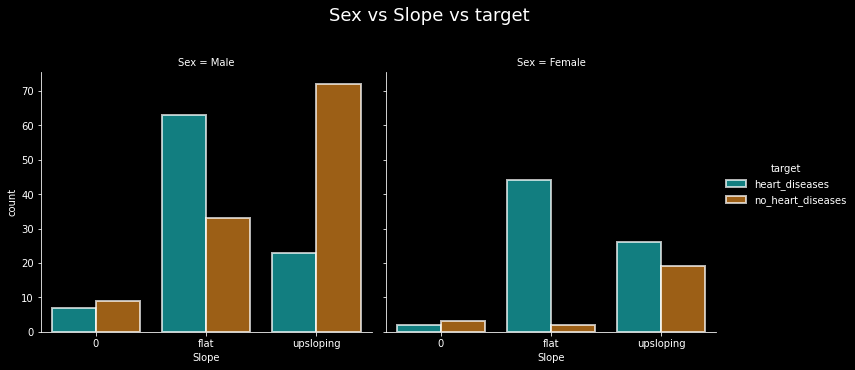

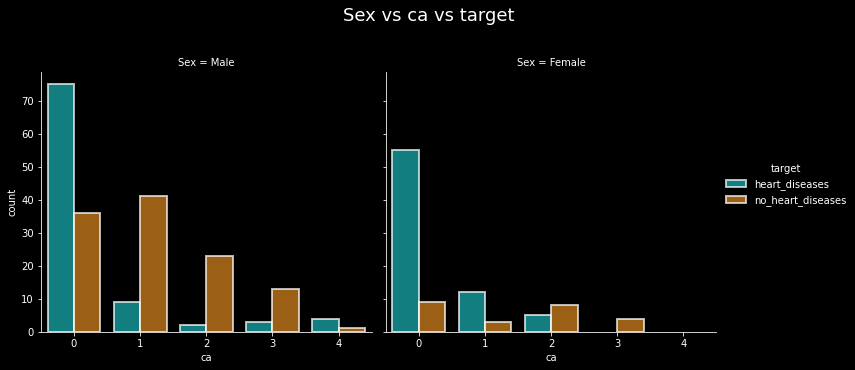

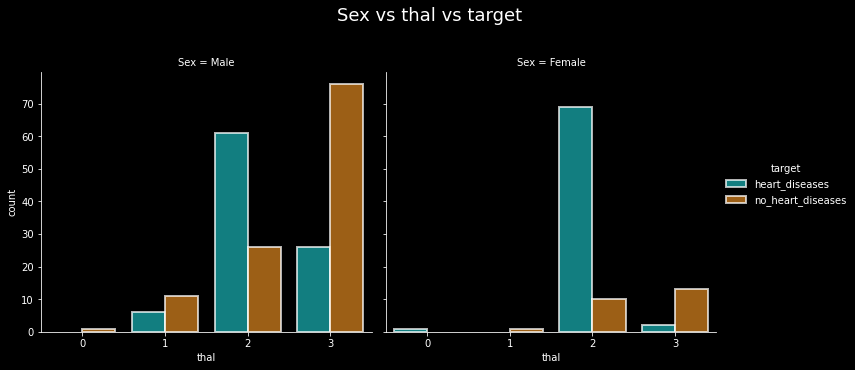

In [16]:
multivariate_count('exang')
multivariate_count('fbs')
multivariate_count('Chest_Pain')
multivariate_count('ca')
multivariate_count('restecg')
multivariate_count('Slope') 
multivariate_count('thal')
multivariate_count('Sex')

# Feature engineering and Data Preprocessing

In [17]:
data.head()

,Age,Sex,Chest_Pain,trestbps,chol,fbs,restecg,Heart_Rate,exang,Oldpeak,Slope,ca,thal,target
0,63,Male,Non_angina_pain,145,233,High,normal,150,No,2.3,0,0,1,heart_diseases
1,37,Male,Atypical_angina,130,250,Low,abnormal,187,No,3.5,0,0,2,heart_diseases
2,41,Female,Typical_angina,130,204,Low,normal,172,No,1.4,flat,0,2,heart_diseases
3,56,Male,Typical_angina,120,236,Low,abnormal,178,No,0.8,flat,0,2,heart_diseases
4,57,Female,0,120,354,Low,abnormal,163,Yes,0.6,flat,0,2,heart_diseases


From the dataset, we have total number of 14 features,  seven features are numerical while the other eight features are availabe in object. 

In [43]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data.iloc[:,1] = enc.fit_transform(data.iloc[:,1]) 
data.iloc[:,2] = enc.fit_transform(data.iloc[:,2]) 
data.iloc[:,5] = enc.fit_transform(data.iloc[:,5]) 
data.iloc[:,6] = enc.fit_transform(data.iloc[:,6]) 
data.iloc[:,8] = enc.fit_transform(data.iloc[:,8]) 
data.iloc[:,10] = enc.fit_transform(data.iloc[:,10]) 
data.iloc[:,13] = enc.fit_transform(data.iloc[:,13]) 

All the object features were converted to numerical value using LabelEncoder

In [44]:
data.head()

,Age,Sex,Chest_Pain,trestbps,chol,fbs,restecg,Heart_Rate,exang,Oldpeak,Slope,ca,thal,target
0,63,1,2,145,233,0,2,150,0,2.3,0,0,1,0
1,37,1,1,130,250,1,1,187,0,3.5,0,0,2,0
2,41,0,3,130,204,1,2,172,0,1.4,1,0,2,0
3,56,1,3,120,236,1,1,178,0,0.8,1,0,2,0
4,57,0,0,120,354,1,1,163,1,0.6,1,0,2,0


In [45]:
data.tail()

,Age,Sex,Chest_Pain,trestbps,chol,fbs,restecg,Heart_Rate,exang,Oldpeak,Slope,ca,thal,target
298,57,0,0,140,241,1,1,123,1,0.2,2,0,3,1
299,45,1,2,110,264,1,1,132,0,1.2,2,0,3,1
300,68,1,0,144,193,0,1,141,0,3.4,2,2,3,1
301,57,1,0,130,131,1,1,115,1,1.2,2,1,3,1
302,57,0,3,130,236,1,2,174,0,0.0,2,1,2,1


Where 1 = No heart diseases and 0 = Heart diseases


## Autocorrlation Graphs

<AxesSubplot:>

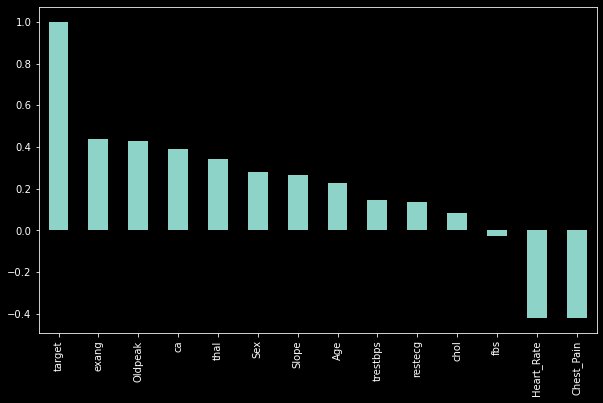

In [46]:
plt.figure(figsize=(10,6))
data.corr()['target'].sort_values(ascending=False).plot.bar()

 I plot the correlation graph to examine the relationship between the dependent variable and explanatory variables 

<AxesSubplot:>

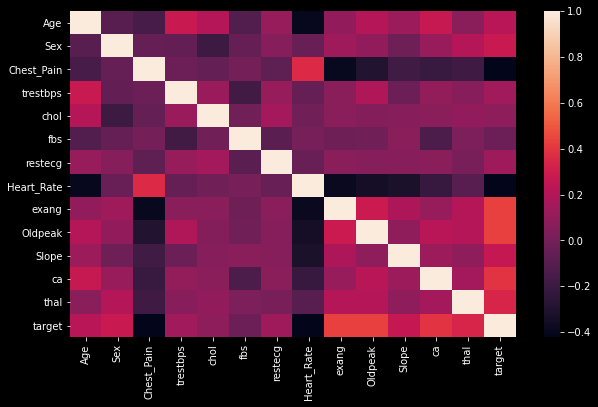

In [37]:

sns.heatmap(data.corr())

In [54]:
#import xgboost as xgb
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import train_test_split
#X = data.drop('target', axis=1)
#y = data['target']

## chi square feature selection 

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [48]:

# Train/Test Split

X = data.drop('target', axis = 1)
y = data['target']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

Feature 0: 12.729167
Feature 1: 25.001954
Feature 2: 64.894345
Feature 3: 3.682917
Feature 4: 2.866763
Feature 5: 5.034574
Feature 6: 60.209347
Feature 7: 70.071045
Feature 8: 51.912405
Feature 9: 16.550677
Feature 10: 39.588700
Feature 11: 18.829769


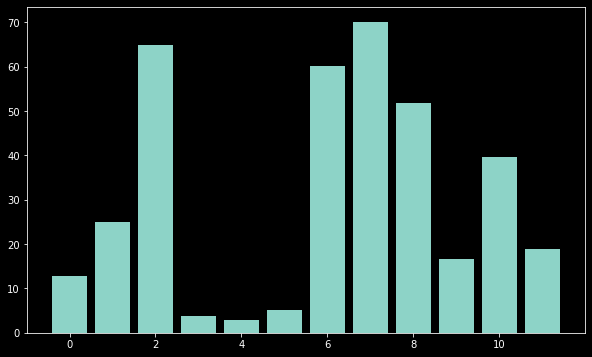

In [40]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

A bar chart of the feature importance scores for each input feature is created. This clearly shows that feature 2,6,7,8 and 10 might be the most relevant (according to test).

# Model Trainning and Result Evaluation 

In [50]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://jessesw.com/images/Rec_images/MaskTrain.png")

In [51]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test.values), columns=X.columns)

print("Feature space holds %d observations and %d features" % X_train.shape)
print("Unique target labels:", np.unique(y_train))

Feature space holds 242 observations and 13 features
Unique target labels: [0 1]


In [52]:
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import  XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

In [53]:
kfold = StratifiedKFold(n_splits=5)

C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


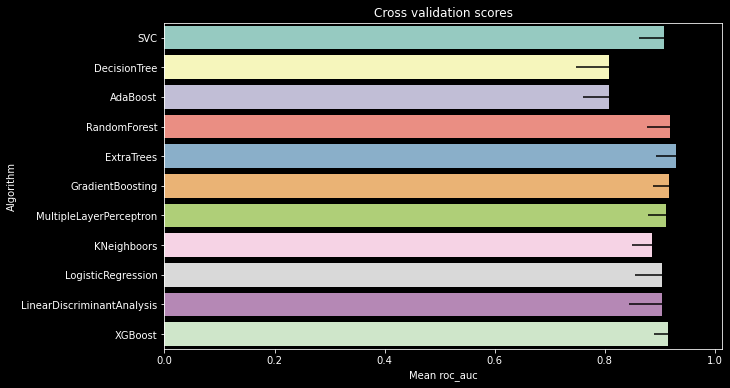

In [54]:
# Test differents algorithms 
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state=random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "roc_auc", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean roc_auc")
g = g.set_title("Cross validation scores")    
    
    

I decide to choose: SVC, RandomForest, GradientBoosting and logistic Regression, XGBoost, for further fine-tunning and the ensemble modeling

# Tuning the hyper-parameter estimators

## SVM

In [55]:
#grid search optimization for the classifiers
### SVC classifier
svm = SVC(probability=True)
svm_param_grid = {'kernel': ['rbf','linear', 'poly'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

grid_svm = GridSearchCV(svm, param_grid = svm_param_grid, cv=5, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_svm.fit(X_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 392 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  1.2min finished


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='roc_auc', verbose=1)

In [56]:
#I visualise  the result in the dataframe 
dp = pd.DataFrame(grid_svm.cv_results_)
dp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013402,0.000801,0.005803,0.000400,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.828283,0.863636,0.947090,0.917108,0.966783,0.904580,0.051635,26
1,0.028806,0.009704,0.005601,0.000799,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.848485,0.846801,0.954145,0.918871,0.959790,0.905618,0.049373,21
2,0.013603,0.004455,0.008603,0.003009,1,0.001,poly,"{'C': 1, 'gamma': 0.001, 'kernel': 'poly'}",0.851852,0.848485,0.938272,0.934744,0.989510,0.912573,0.054527,11
3,0.019404,0.012941,0.005804,0.000749,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.823232,0.850168,0.947090,0.922399,0.970280,0.902634,0.056569,43
4,0.036010,0.009656,0.012004,0.009616,1,0.01,linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",0.848485,0.846801,0.954145,0.918871,0.959790,0.905618,0.049373,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,8.232347,1.679581,0.004601,0.000489,1000,0.1,linear,"{'C': 1000, 'gamma': 0.1, 'kernel': 'linear'}",0.853535,0.831650,0.948854,0.925926,0.959790,0.903951,0.051742,27
80,0.015001,0.001096,0.004804,0.001167,1000,0.1,poly,"{'C': 1000, 'gamma': 0.1, 'kernel': 'poly'}",0.787879,0.835017,0.887125,0.767196,0.737762,0.802996,0.052666,73
81,0.016000,0.000894,0.004603,0.000801,1000,1,rbf,"{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}",0.728956,0.771044,0.839506,0.843034,0.842657,0.805039,0.046885,67
82,8.610695,1.878816,0.003804,0.000401,1000,1,linear,"{'C': 1000, 'gamma': 1, 'kernel': 'linear'}",0.853535,0.831650,0.948854,0.925926,0.959790,0.903951,0.051742,27


In [57]:
pd.DataFrame(grid_svm.cv_results_)[['param_C', 'param_kernel','param_gamma', 'mean_test_score']]

,param_C,param_kernel,param_gamma,mean_test_score
0,1,rbf,0.001,0.904580
1,1,linear,0.001,0.905618
2,1,poly,0.001,0.912573
3,1,rbf,0.01,0.902634
4,1,linear,0.01,0.905618
...,...,...,...,...
79,1000,linear,0.1,0.903951
80,1000,poly,0.1,0.802996
81,1000,rbf,1,0.805039
82,1000,linear,1,0.903951


In [58]:
svm_best = grid_svm.best_estimator_
# Best score
print('Best Score:', grid_svm.best_score_)
print('Best parameters set: \n', grid_svm.best_params_)

Best Score: 0.9146088479421811
Best parameters set: 
 {'C': 50, 'gamma': 0.001, 'kernel': 'poly'}


In [59]:
y_pred_svm = svm_best.predict(X_test)
y_prob_svm = svm_best.predict_proba(X_test)[:,1]

## Random Forest

In [61]:

rf = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=42)
svm_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
rf_param_grid = {
    "max_features": range(2,7),
    "min_samples_split": range(4,10),
    "min_samples_leaf": range(1,6),
}

grid_rf = GridSearchCV(rf, param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 743 out of 750 | elapsed:   16.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   16.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=20,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': range(2, 7),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(4, 10)},
             scoring='roc_auc', verbose=1)

In [62]:
rf_best = grid_rf.best_estimator_
# Best score
print('Best Score:', grid_rf.best_score_)
print('Best parameters set: \n', grid_rf.best_params_)

Best Score: 0.9291813125146458
Best parameters set: 
 {'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [63]:
y_pred_rf = rf_best.predict(X_test)
y_prob_rf = rf_best.predict_proba(X_test)[:,1]

## Logistic Regression

In [ ]:
#grid search optimization for the classifiers

In [64]:
### Logistic Regression classifier

lr = LogisticRegression()
C_grid = 0.001*10**(np.arange(0,1.01,0.01)*3)
lr_param_grid  = {
    'penalty': ['l1', 'l2'], 
    'C': C_grid
}

grid_lr = GridSearchCV(lr, lr_param_grid, scoring='roc_auc')
grid_lr.fit(X_train, y_train)

C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([0.001     , 0.00107152, 0.00114815, 0.00123027, 0.00131826,
       0.00141254, 0.00151356, 0.00162181, 0.0017378 , 0.00186209,
       0.00199526, 0.00213796, 0.00229087, 0.00245471, 0.00263027,
       0.00281838, 0.00301995, 0.00323594, 0.00346737, 0.00371535,
       0.00398107, 0.0042658 , 0.00457088, 0.00489779, 0.00524807,
       0.00562341, 0.00...
       0.12589254, 0.13489629, 0.14454398, 0.15488166, 0.16595869,
       0.17782794, 0.19054607, 0.20417379, 0.21877616, 0.23442288,
       0.25118864, 0.26915348, 0.28840315, 0.30902954, 0.33113112,
       0.35481339, 0.3801894 , 0.40738028, 0.43651583, 0.46773514,
       0.50118723, 0.5370318 , 0.57543994, 0.616595  , 0.66069345,
       0.70794578, 0.75857758, 0.81283052, 0.87096359, 0.9332543 ,
       1.        ]),
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [65]:
lr_best = grid_lr.best_estimator_
# Best score
print('Best Score:', grid_lr.best_score_)
print('Best parameters set: \n', grid_lr.best_params_)

Best Score: 0.9087548254214921
Best parameters set: 
 {'C': 0.21877616239495518, 'penalty': 'l2'}


In [66]:
y_pred_lr = lr_best.predict(X_test)
y_prob_lr = lr_best.predict_proba(X_test)[:,1]

## ExtraTree Classification 

In [67]:

extra =  ExtraTreesClassifier(n_estimators=20, criterion="entropy", random_state=42)
svm_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
extra_param_grid = {
    "max_features": range(2,7),
    "min_samples_split": range(4,10),
    "min_samples_leaf": range(1,6),
}

grid_extra = GridSearchCV(extra, param_grid = extra_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_extra.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 743 out of 750 | elapsed:   12.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   12.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=ExtraTreesClassifier(criterion='entropy',
                                            n_estimators=20, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': range(2, 7),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(4, 10)},
             scoring='roc_auc', verbose=1)

In [68]:
extra_best = grid_extra.best_estimator_
# Best score
print('Best Score:', grid_extra.best_score_)
print('Best parameters set: \n', grid_extra.best_params_)

Best Score: 0.9356717356717358
Best parameters set: 
 {'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 9}


In [69]:
y_pred_extra = extra_best.predict(X_test)
y_prob_extra = extra_best.predict_proba(X_test)[:,1]

##  Gradient Boosting 

In [70]:
# Gradient boosting tunning
gb = GradientBoostingClassifier(random_state=random_state)
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

grid_gb = GridSearchCV(gb,param_grid = gb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_gb.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:   14.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'loss': ['deviance'], 'max_depth': [4, 8],
                         'max_features': [0.3, 0.1],
                         'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [71]:
gb_best = grid_gb.best_estimator_
# Best score
print('Best Score:', grid_gb.best_score_)
print('Best parameters set: \n', grid_gb.best_params_)

Best Score: 0.5
Best parameters set: 
 {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 100}


In [72]:

y_pred_gb = gb_best.predict(X_test)
y_prob_gb = gb_best.predict_proba(X_test)[:,1]

## XGBosst

In [73]:
# XGboost tunning
xgb = GradientBoostingClassifier(random_state=random_state)

#xgb.get_params().keys()
xgb_param_grid = {
    'learning_rate': [0.025,0.05,0.1], 
    'max_depth': [3,4,5],
    'subsample': [0.25,0.5,1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid = xgb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:    7.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=4,
             param_grid={'learning_rate': [0.025, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'subsample': [0.25, 0.5, 1.0]},
             scoring='roc_auc', verbose=1)

In [74]:
xgb_best = grid_xgb.best_estimator_
# Best score
print('Best Score:', grid_xgb.best_score_)
print('Best parameters set: \n', grid_xgb.best_params_)

Best Score: 0.9245230078563413
Best parameters set: 
 {'learning_rate': 0.025, 'max_depth': 3, 'subsample': 1.0}


In [75]:
y_pred_xgb = xgb_best.predict(X_test)
y_prob_xgb = xgb_best.predict_proba(X_test)[:,1]

In [76]:
# print a summary of the scores
def print_grid_search_metrics(gs):
    print("Best score: %0.3f" % gs.best_score_)
    print("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

## Comparing the best models

I will take a closer look of the selected models for hyperparameter tunning and plot learning curve and confusion matrix 


In [77]:
"""
print_grid_search_metrics(grid_svm)
print_grid_search_metrics(grid_rf)
print_grid_search_metrics(grid_gb)
print_grid_search_metrics(grid_extra)
print_grid_search_metrics(grid_lr)
print_grid_search_metrics(grid_xgb)
"""

'\nprint_grid_search_metrics(grid_svm)\nprint_grid_search_metrics(grid_rf)\nprint_grid_search_metrics(grid_gb)\nprint_grid_search_metrics(grid_extra)\nprint_grid_search_metrics(grid_lr)\nprint_grid_search_metrics(grid_xgb)\n'

In [ ]:
#Best_xgb = grid_xgb.best_score_
#Best_extra = grid_extra.best_score_
#Best_rf= grid_rf.best_score_
#Best_svm = grid_svm.best_score_
#Best_lr = grid_lr.best_score_

In [78]:
Best_Grid_Search = pd.DataFrame({'Models': ['XGbost','ExtraTreeClassifier','RandomForest','GredientBoosting','SupportVectorMachine','LogisticRegression'],
        'Best_Score': [grid_xgb.best_score_, grid_extra.best_score_, grid_rf.best_score_, grid_gb.best_score_, grid_svm.best_score_,grid_lr.best_score_]
        })

Best_Grid_Search

,Models,Best_Score
0,XGbost,0.924523
1,ExtraTreeClassifier,0.935672
2,RandomForest,0.929181
3,GredientBoosting,0.500000
4,SupportVectorMachine,0.914609
5,LogisticRegression,0.908755


# Model Evaluation
## Learning Cuvres

Learning curves are a good way to see the overfitting effect on the training set and the effect of the training size on the accuracy.

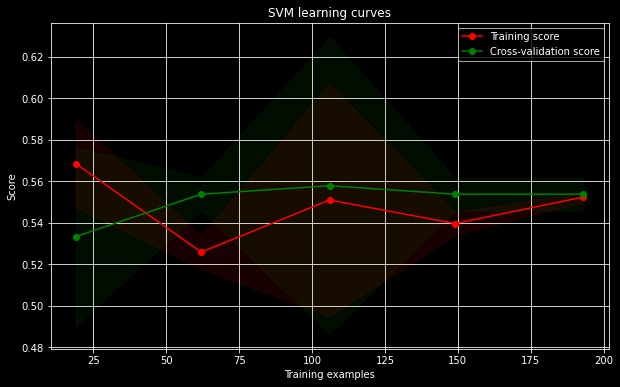

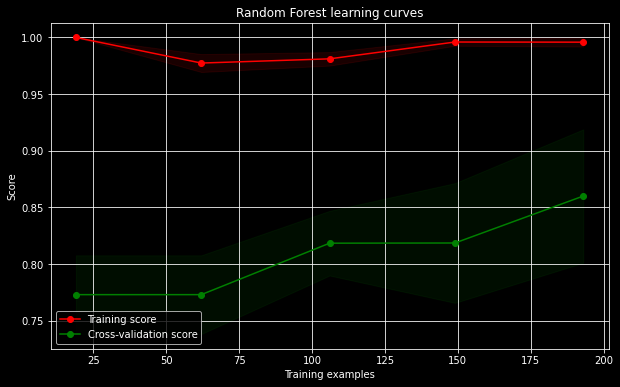

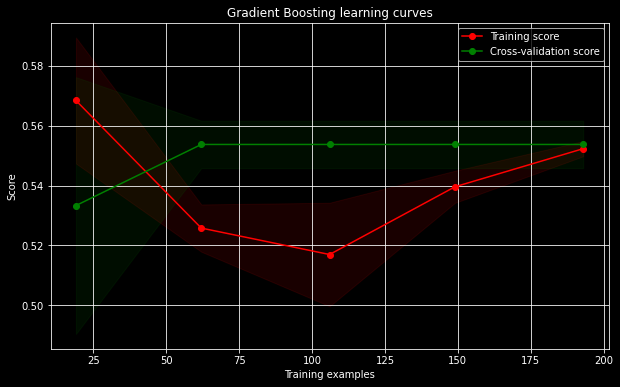

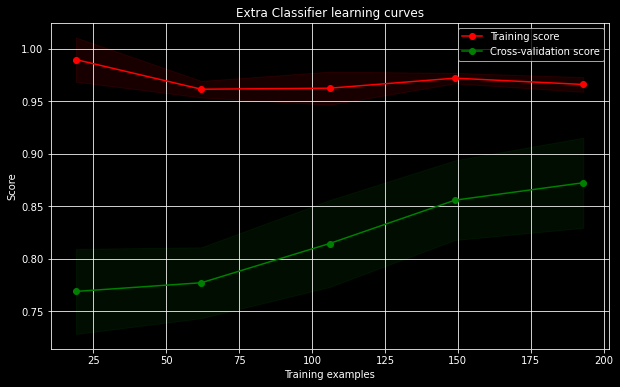

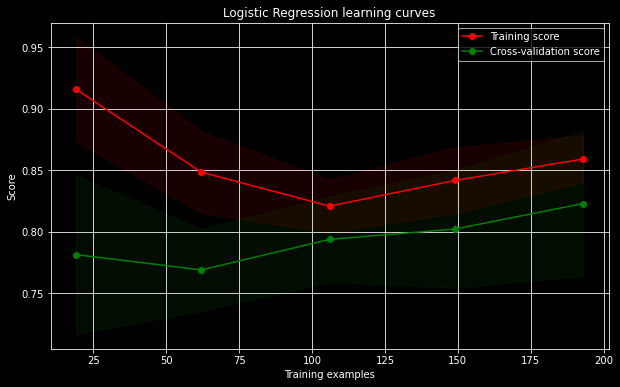

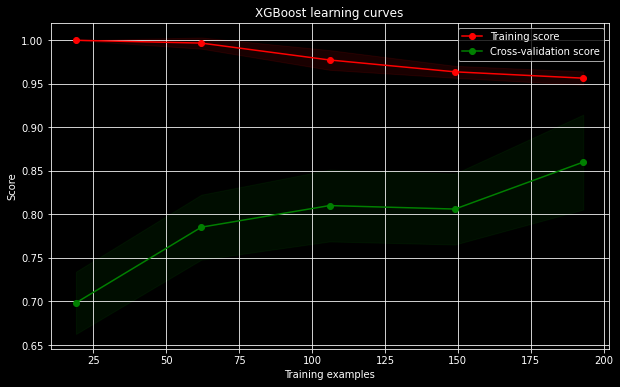

In [80]:
#grid_svm, grid_rf, grid_gb, grid_knn, grid_lr, grid_xgb

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(grid_svm.best_estimator_,"SVM learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_rf.best_estimator_,"Random Forest learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_gb.best_estimator_,"Gradient Boosting learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_extra.best_estimator_,"Extra Classifier learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_lr.best_estimator_,"Logistic Regression learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_xgb.best_estimator_,"XGBoost learning curves",X_train,y_train,cv=kfold)

In [ ]:
GradientBoosting, KNN, Random Forest tend to overfit the training set. According to the growing cross-validation curves GradientBoosting and Adaboost could perform better with more training examples.

SVC and XGBoost classifiers seem to better generalize the prediction since the training and cross-validation curves are close together.

## Calculate Confusion Matrix (Precision, Recall, Accuracy)

The confusion matrix tells how the tuples in training and testing models are correctly classified. The models are evaluated based on parameters such as precession, recall, accuracy and F1 score.The precession is the proportion of the heart disease patient that are correctly predicted and classified . Recall is the proportion of non heart disease patients that are incorrectly predicted or classified. 

In [81]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

def cal_evaluation(classifier, cm, auc):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2 * precision * recall / (precision + recall)
    print(classifier)
    print("Accuracy is " + str(accuracy))
    print("Precision is " + str(precision))
    print("Recall is " + str(recall))
    print("F1 score is " + str(f1))
    print("ROC AUC is " + str(auc))

def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not Disease','Disease']
    for x in confusion_matrices:
        classifier, cm, auc = x[0], x[1], x[2]
        cal_evaluation(classifier, cm, auc)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for {}'.format(classifier))
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

[0 1]
Gradient Boosting
Accuracy is 0.7540983606557377
Precision is 0.8
Recall is 0.6666666666666666
F1 score is 0.7272727272727272
ROC AUC is 0.8440860215053764


<ipython-input-81-470b493021ad>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_names)
<ipython-input-81-470b493021ad>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_names)


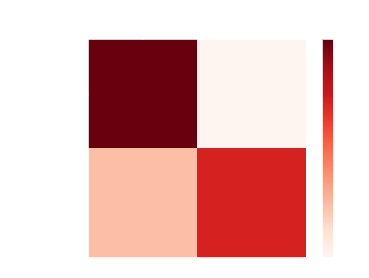

Logisitic Regression
Accuracy is 0.7704918032786885
Precision is 0.8076923076923077
Recall is 0.7
F1 score is 0.75
ROC AUC is 0.8516129032258065


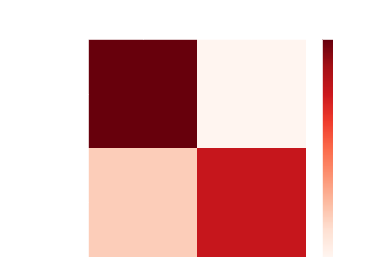

ExtraTreeClassifiers
Accuracy is 0.7704918032786885
Precision is 0.7857142857142857
Recall is 0.7333333333333333
F1 score is 0.7586206896551724
ROC AUC is 0.8408602150537634


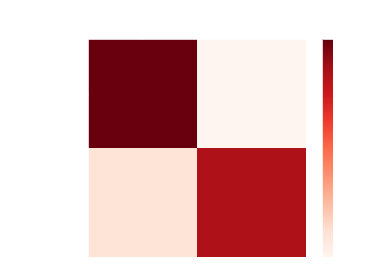

Random Forest
Accuracy is 0.7049180327868853
Precision is 0.7142857142857143
Recall is 0.6666666666666666
F1 score is 0.689655172413793
ROC AUC is 0.8333333333333334


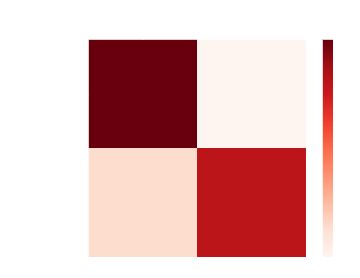

<ipython-input-81-470b493021ad>:9: RuntimeWarning: invalid value encountered in true_divide
  precision = tp / (tp + fp + 0.0)


Support Vector Machine
Accuracy is 0.5081967213114754
Precision is nan
Recall is 0.0
F1 score is nan
ROC AUC is 0.8494623655913979


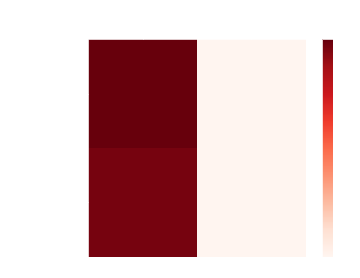

XGBoost Classifier
Accuracy is 0.7213114754098361
Precision is 0.76
Recall is 0.6333333333333333
F1 score is 0.6909090909090909
ROC AUC is 0.8279569892473118


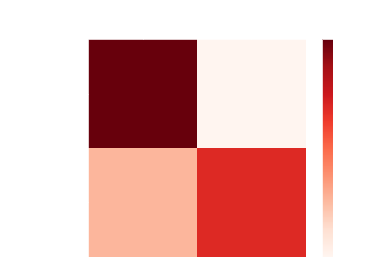

In [83]:
%matplotlib inline

y = np.array(y)
class_names = np.unique(y)
print(class_names)

confusion_matrices = [
    ("Gradient Boosting", confusion_matrix(y_test, y_pred_gb), roc_auc_score(y_test, y_prob_gb)),
    ("Logisitic Regression", confusion_matrix(y_test, y_pred_lr), roc_auc_score(y_test, y_prob_lr)),
    ("ExtraTreeClassifiers", confusion_matrix(y_test, y_pred_extra), roc_auc_score(y_test, y_prob_extra)),
    ("Random Forest", confusion_matrix(y_test, y_pred_rf), roc_auc_score(y_test, y_prob_rf)),
    ("Support Vector Machine", confusion_matrix(y_test, y_pred_svm), roc_auc_score(y_test, y_prob_svm)),
    ("XGBoost Classifier", confusion_matrix(y_test, y_pred_xgb), roc_auc_score(y_test, y_prob_xgb))
    
]

draw_confusion_matrices(confusion_matrices)

## Feature importance of tree based classifiers

In [ ]:
In order to see the most informative features for the prediction of passengers survival, i displayed the feature importance for the tree based classifiers.

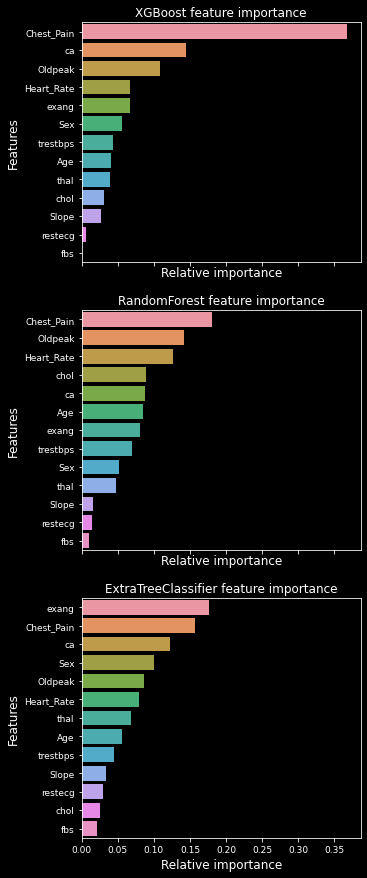

In [82]:
#nrows = ncols = 2
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(5,15))

names_classifiers = [("XGBoost", xgb_best),("RandomForest",rf_best),("ExtraTreeClassifier",extra_best)]

nclassifier = 0
for row in range(nrows):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    nclassifier += 1

# Ensemble combination modelling 

I chosed a voting classifier to combine all the predictions together.I preferred to pass the argument "soft" to the voting parameter to take into account the probability of each vote.

In [84]:
votingC = VotingClassifier(estimators=[('rf', rf_best), ('lr',lr_best),('extra', extra_best),
('svm', svm_best), ('gb',gb_best),('xgb',xgb_best)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, y_train)

In [85]:

y_pred_voting = votingC.predict(X_test)
y_prob_voting = votingC.predict_proba(X_test)[:,1]

Ensemble modeling
Accuracy is 0.7540983606557377
Precision is 0.8
Recall is 0.6666666666666666
F1 score is 0.7272727272727272
ROC AUC is 0.8440860215053763


<ipython-input-81-470b493021ad>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_names)
<ipython-input-81-470b493021ad>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_names)


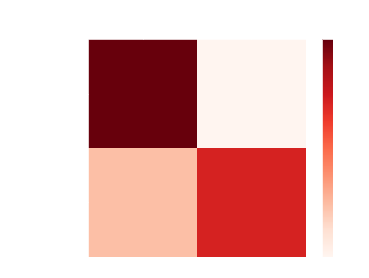

In [93]:

confusion_matrices = [
    ("Ensemble modeling", confusion_matrix(y_test, y_pred_voting), roc_auc_score(y_test, y_prob_voting))   
]
draw_confusion_matrices(confusion_matrices)

In [105]:
plt.style.use('dark_background')

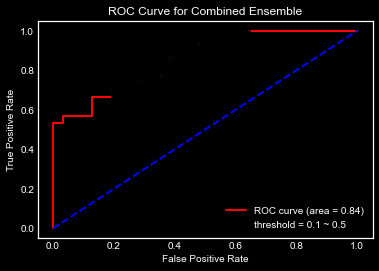

In [106]:
# make the ROC curve
fpr, tpr, thresh = roc_curve(y_test, y_prob_voting, pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob_voting)

# These are the points at threshold = 0.1~0.5
x1 = fpr[(thresh <= 0.5) & (thresh >= 0.1)] 
x2 = tpr[(thresh <= 0.5) & (thresh >= 0.1)]

fig = plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.plot(x1, x2, color='k', lw=3, label='threshold = 0.1 ~ 0.5')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Combined Ensemble')
plt.legend(loc="lower right")
plt.show()

In [90]:
confusion_matrix(y_test, y_pred_voting)

array([[26,  5],
       [10, 20]], dtype=int64)

In [ ]:
The AUROC score of 0.84301 is smaller than the logistic regression  score of 0.85 and ExtraTreeClassifier.84% . In this study i considerd logistic regression for finall prediction

# Logistic Regression for predictions

Logistic Regression
Accuracy is 0.7704918032786885
Precision is 0.8076923076923077
Recall is 0.7
F1 score is 0.75
ROC AUC is 0.8516129032258065


<ipython-input-81-470b493021ad>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_names)
<ipython-input-81-470b493021ad>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_names)


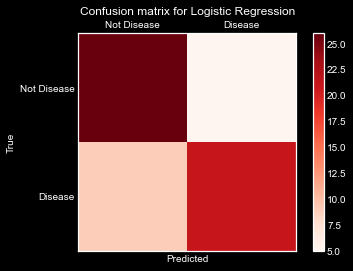

In [107]:
confusion_matrices = [
    ("Logistic Regression", confusion_matrix(y_test, y_pred_lr), roc_auc_score(y_test, y_prob_lr))
]

draw_confusion_matrices(confusion_matrices)

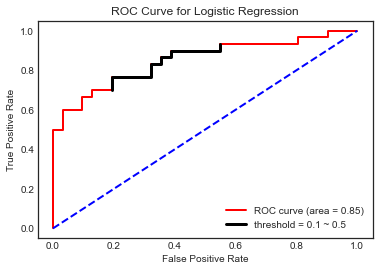

In [108]:

# make the ROC curve
plt.style.use('seaborn-white')
fpr, tpr, thresh = roc_curve(y_test, y_prob_lr, pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob_lr)

# These are the points at threshold = 0.1~0.5
x1 = fpr[(thresh <= 0.5) & (thresh >= 0.1)] 
x2 = tpr[(thresh <= 0.5) & (thresh >= 0.1)]

fig = plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.plot(x1, x2, color='k', lw=3, label='threshold = 0.1 ~ 0.5')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [109]:
confusion_matrix(y_test, y_pred_lr)

array([[26,  5],
       [ 9, 21]], dtype=int64)

In [127]:

#from sklearn.metrics import classification_report

#classification_report_result = classification_report(y_test, y_pred_lr)
                                                    
#print(classification_report_result)

I will check how different evaluation metrics change with the threshold

In [120]:
acc_grid = np.zeros(thresh.shape)
prec_grid = np.zeros(thresh.shape)
recall_grid = np.zeros(thresh.shape)
TP_grid = np.zeros(thresh.shape)
FP_grid = np.zeros(thresh.shape)
FN_grid = np.zeros(thresh.shape)

for i in range(thresh.shape[0]):
    cm = confusion_matrix(y_test, y_prob_lr >= thresh[i])
    acc_grid[i] = accuracy_score(y_test, y_prob_lr >= thresh[i])
    prec_grid[i] = precision_score(y_test, y_prob_lr >= thresh[i])
    recall_grid[i] = recall_score(y_test, y_prob_lr >= thresh[i])
    TP_grid[i] = cm[1][1]
    FP_grid[i] = cm[0][1]
    FN_grid[i] = cm[1][0]

C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


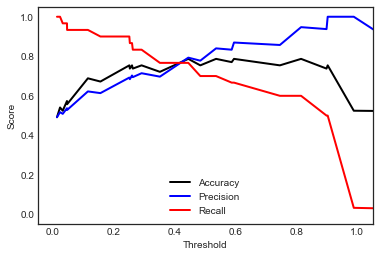

In [121]:
fig = plt.figure()
plt.plot(thresh, acc_grid, color='k', lw=2, label='Accuracy')
plt.plot(thresh, prec_grid, color='b', lw=2, label='Precision')
plt.plot(thresh, recall_grid, color='r', lw=2, label='Recall')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(loc="lower center")
plt.show()

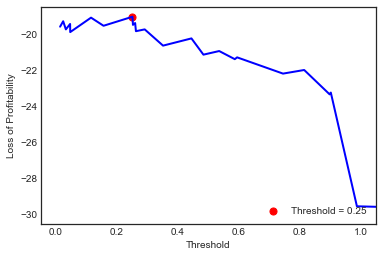

In [123]:

P = 0.5 
loss = TP_grid*P*(-0.1) + TP_grid*(1-P)*(-1) + FN_grid*(-1) + FP_grid*(-0.1)
thresh_best = thresh[loss == max(loss)][0]
    
fig = plt.figure()
plt.plot(thresh, loss, color='b', lw=2)
plt.scatter([thresh_best], [max(loss)], color='r', s=50, label='Threshold = {:.2f}'.format(thresh_best))
plt.xlim([-0.05, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Loss of Profitability')
plt.legend(loc="lower right")
plt.show()

We see that the loss is minimized at threshold = 0.25. Now let's take a look at the confusion matrix using this threshold.

Logistic Rregression
Accuracy is 0.7377049180327869
Precision is 0.6842105263157895
Recall is 0.8666666666666667
F1 score is 0.7647058823529413
ROC AUC is 0.8516129032258065


<ipython-input-81-470b493021ad>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_names)
<ipython-input-81-470b493021ad>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_names)


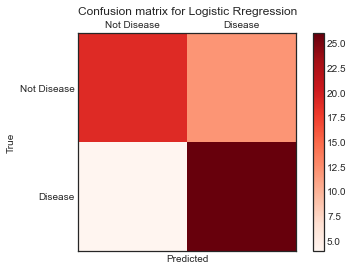

In [126]:
y_pred_lr_new = y_prob_lr > thresh_best

confusion_matrices = [
    ("Logistic Rregression", confusion_matrix(y_test, y_pred_lr_new), roc_auc_score(y_test, y_prob_lr))
]

draw_confusion_matrices(confusion_matrices)

In [125]:
confusion_matrix(y_test, y_pred_lr_new)

array([[19, 12],
       [ 4, 26]], dtype=int64)

In [149]:
import pickle
pickle_save_model = open("heart_model.pkl","wb")
pickle.dump(model, pickle_save_model)
pickle_save_model.close()